C:\Users\ChienYu\AppData\Local\Temp\ipykernel_9064\2889366625.py:6: RuntimeWarning: invalid value encountered in sqrt
  f2 = lambda x: np.sqrt(l2**2 - x**2)


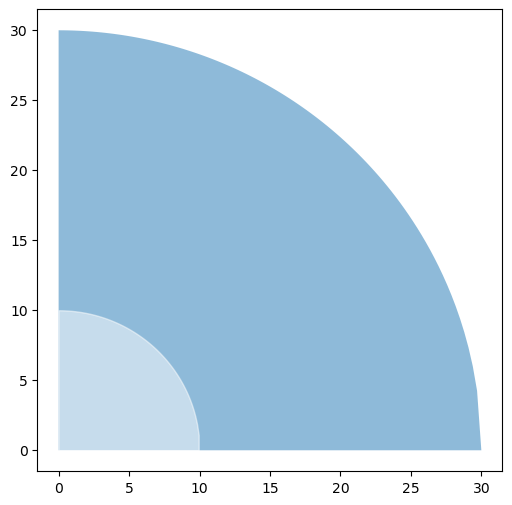

In [1]:
import numpy as np
import matplotlib.pyplot as plt

l1, l2 = 20, 10
f1 = lambda x: np.sqrt((l1 + l2) ** 2 - x**2)
f2 = lambda x: np.sqrt(l2**2 - x**2)

plt.figure(figsize=(6,6))
x = np.linspace(0, l1+l2, 100)
plt.fill_between(x, f1(x), 0, alpha=0.5)
x = np.linspace(0, 12, 100)
plt.fill_between(x, f2(x), 0, color="white", alpha=0.5)
plt.show()

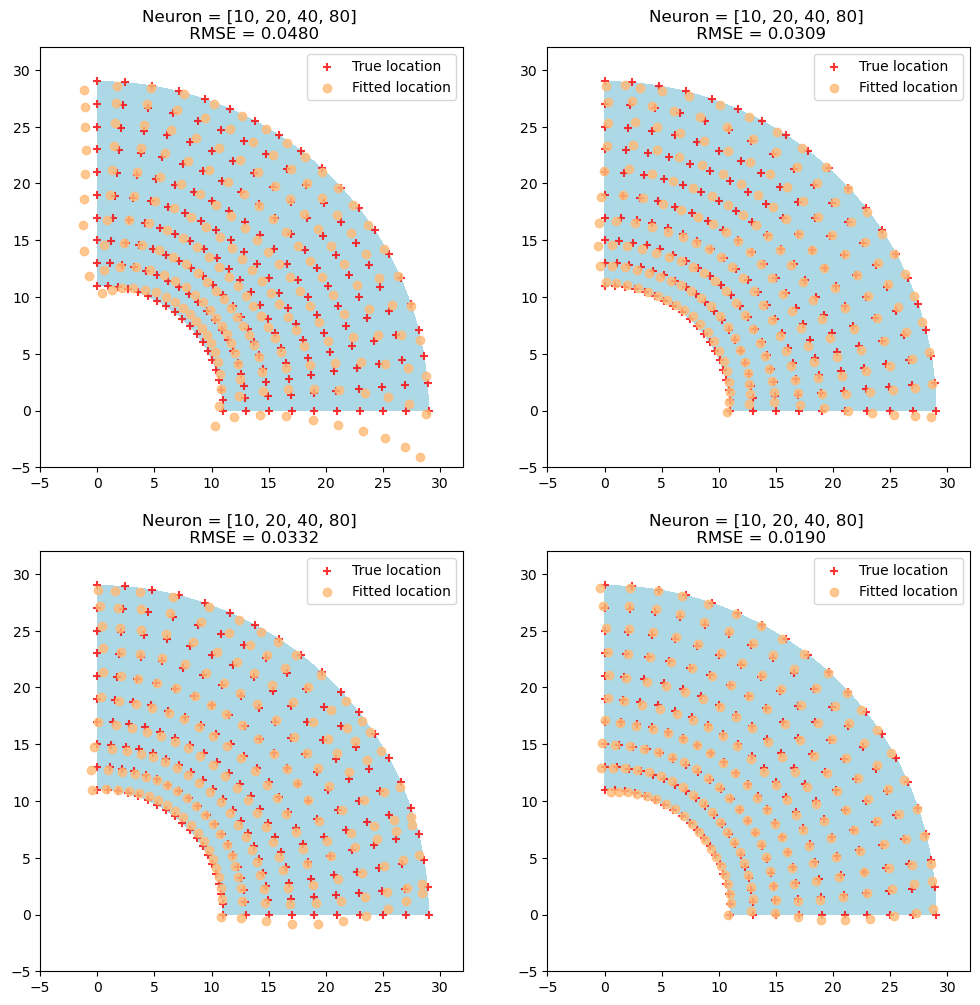

In [233]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

l1, l2 = 20, 10
f1 = lambda x : np.sqrt((l1 + l2) ** 2 - x ** 2)
f2 = lambda x : np.sqrt(l2 ** 2 - x ** 2)

t = np.linspace(0, np.pi / 2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)

X = l.reshape(-1, 1) * np.cos(t)
Y = l.reshape(-1, 1) * np.sin(t)

theta2 = np.arccos((X.ravel() ** 2 + Y.ravel() ** 2 - l1 ** 2 - l2 ** 2) / (2 * l1 * l2))
theta1 = np.arctan(Y.ravel() / X.ravel()) - np.arctan(l2 * np.sin(theta2) / (l1 + l2 * np.cos(theta2)))

InputX = np.c_[X.ravel(), Y.ravel()]
OutputY = np.c_[theta1, theta2]

Neuron = [(10), (20), (40), (80)]
rmses = []

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
#plt.suptitle('Hidden Layer Counts and Accuracy of Fitting')

for i, hidden_layer in enumerate(Neuron):
    mlp_reg = MLPRegressor(max_iter=8000, solver='lbfgs', hidden_layer_sizes=hidden_layer, verbose=False,
                           activation='logistic', tol=1e-6, random_state=0)
    mlp_reg.fit(InputX, OutputY)  
    OutputY_hat = mlp_reg.predict(InputX) 
    theta1_hat, theta2_hat = OutputY_hat[:, 0], OutputY_hat[:, 1]

    x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat + theta2_hat)
    y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat + theta2_hat)

    rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
    rmses.append(rmse)

    row = i // 2
    col = i % 2

    ax[row][col].contourf(X, Y, theta1.reshape(X.shape), colors='lightblue')
    ax[row][col].scatter(X, Y, color='r', marker='+', alpha=0.8, label='True location')
    ax[row][col].scatter(x_hat, y_hat, color='#FFBB77', marker='o', alpha=0.8, label='Fitted location')
    ax[row][col].set_xlim(-5, 32)
    ax[row][col].set_ylim(-5, 32)
    ax[row][col].set_title(f'Neuron = {Neuron} \n RMSE = {rmse:.4f}')
    ax[row][col].legend()

plt.savefig('plot_29.png', dpi=300, bbox_inches='tight')
plt.show()

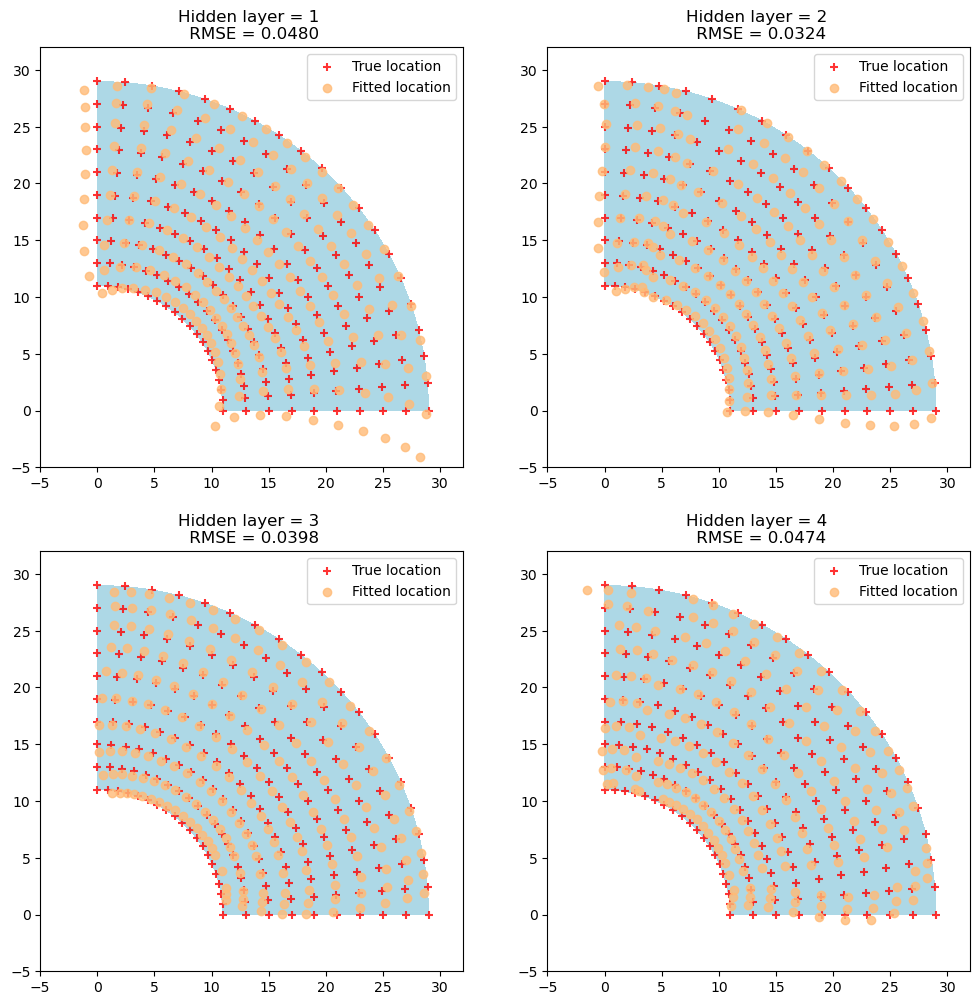

In [204]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

l1, l2 = 20, 10
f1 = lambda x : np.sqrt((l1 + l2) ** 2 - x ** 2)
f2 = lambda x : np.sqrt(l2 ** 2 - x ** 2)

t = np.linspace(0, np.pi / 2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)

X = l.reshape(-1, 1) * np.cos(t)
Y = l.reshape(-1, 1) * np.sin(t)

theta2 = np.arccos((X.ravel() ** 2 + Y.ravel() ** 2 - l1 ** 2 - l2 ** 2) / (2 * l1 * l2))
theta1 = np.arctan(Y.ravel() / X.ravel()) - np.arctan(l2 * np.sin(theta2) / (l1 + l2 * np.cos(theta2)))

InputX = np.c_[X.ravel(), Y.ravel()]
OutputY = np.c_[theta1, theta2]

hidden_layers = [(10,), (10,10,), (10, 10, 10,), (10, 10, 10,10,)]
number = [1,2,3,4]
rmses = []

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
#plt.suptitle('Hidden Layer Counts and Accuracy of Fitting')

for i, hidden_layer in enumerate(hidden_layers):
    mlp_reg = MLPRegressor(max_iter=8000, solver='lbfgs', hidden_layer_sizes=hidden_layer, verbose=False,
                           activation='logistic', tol=1e-6, random_state=0)
    mlp_reg.fit(InputX, OutputY)  
    OutputY_hat = mlp_reg.predict(InputX) 
    theta1_hat, theta2_hat = OutputY_hat[:, 0], OutputY_hat[:, 1]

    x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat + theta2_hat)
    y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat + theta2_hat)

    rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
    rmses.append(rmse)

    row = i // 2
    col = i % 2

    ax[row][col].contourf(X, Y, theta1.reshape(X.shape), colors='lightblue')
    ax[row][col].scatter(X, Y, color='r', marker='+', alpha=0.8, label='True location')
    ax[row][col].scatter(x_hat, y_hat, color='#FFBB77', marker='o', alpha=0.8, label='Fitted location')
    ax[row][col].set_xlim(-5, 32)
    ax[row][col].set_ylim(-5, 32)
    ax[row][col].set_title(f'Hidden layer = {i+1} \n RMSE = {rmse:.4f}')
    ax[row][col].legend()
    # ax[0][0].set_title(f'Hidden layer = 1 \n RMSE = {rmse:.4f}')
    # ax[0][1].set_title(f'Hidden layer = 2 \n RMSE = {rmse:.4f}')
    # ax[1][0].set_title(f'Hidden layer = 3 \n RMSE = {rmse:.4f}')
    # ax[1][1].set_title(f'Hidden layer = 4 \n RMSE = {rmse:.4f}')
plt.savefig('plot_44.png', dpi=300, bbox_inches='tight')
plt.show()

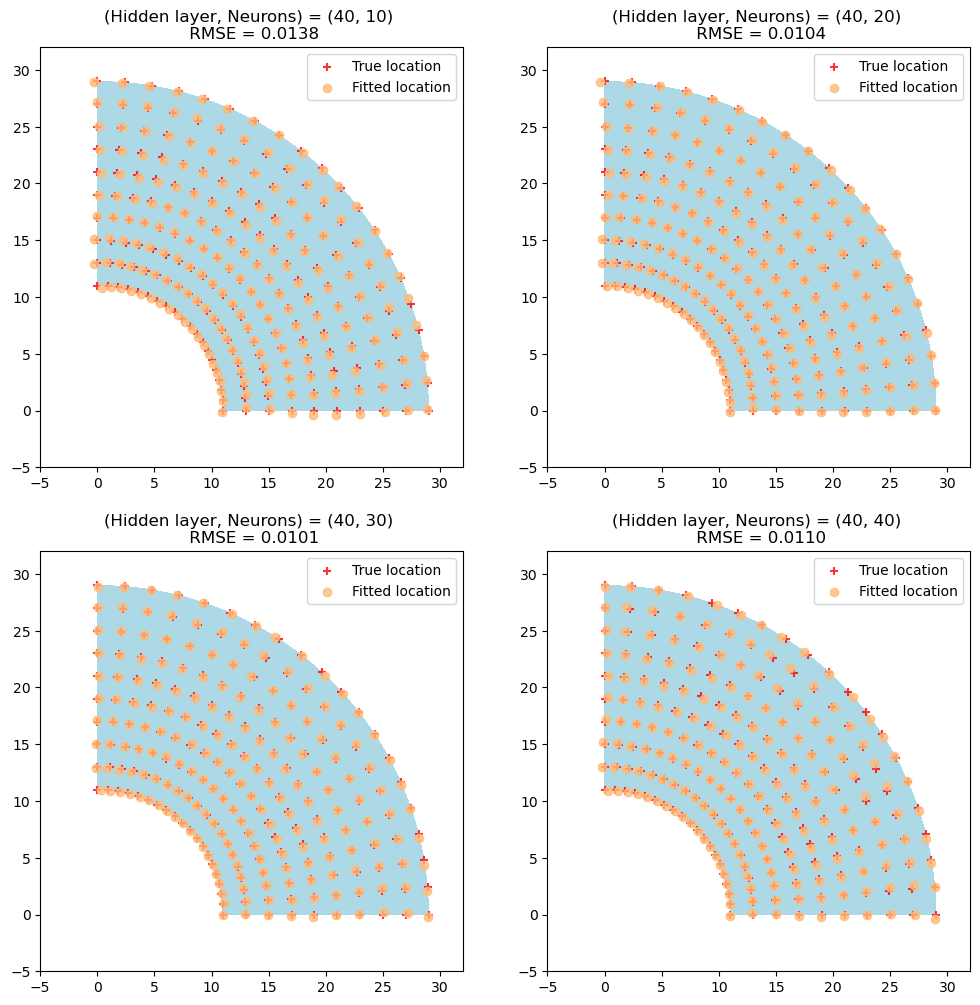

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

l1, l2 = 20, 10
f1 = lambda x: np.sqrt((l1 + l2) ** 2 - x ** 2)
f2 = lambda x: np.sqrt(l2 ** 2 - x ** 2)

t = np.linspace(0, np.pi / 2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)

X = l.reshape(-1, 1) * np.cos(t)
Y = l.reshape(-1, 1) * np.sin(t)

theta2 = np.arccos((X.ravel() ** 2 + Y.ravel() ** 2 - l1 ** 2 - l2 ** 2) / (2 * l1 * l2))
theta1 = np.arctan(Y.ravel() / X.ravel()) - np.arctan(l2 * np.sin(theta2) / (l1 + l2 * np.cos(theta2)))

InputX = np.c_[X.ravel(), Y.ravel()]
OutputY = np.c_[theta1, theta2]

hidden_layers = [(40, 10), (40, 20), (40, 30), (40, 40)]
rmses = []

fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for i, hidden_layer in enumerate(hidden_layers):
    mlp_reg = MLPRegressor(max_iter=8000, solver='lbfgs', hidden_layer_sizes=hidden_layer, verbose=False,
                           activation='logistic', tol=1e-6, random_state=0)
    mlp_reg.fit(InputX, OutputY)
    OutputY_hat = mlp_reg.predict(InputX)
    theta1_hat, theta2_hat = OutputY_hat[:, 0], OutputY_hat[:, 1]

    x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat + theta2_hat)
    y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat + theta2_hat)

    rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
    rmses.append(rmse)

    row = i // 2
    col = i % 2

    ax[row][col].contourf(X, Y, theta1.reshape(X.shape), colors='lightblue')
    ax[row][col].scatter(X, Y, color='r', marker='+', alpha=0.8, label='True location')
    ax[row][col].scatter(x_hat, y_hat, color='#FFBB77', marker='o', alpha=0.8, label='Fitted location')
    ax[row][col].set_xlim(-5, 32)
    ax[row][col].set_ylim(-5, 32)
    ax[row][col].set_title(f'(Hidden layer, Neurons) = {hidden_layer} \n RMSE = {rmse:.4f}')
    ax[row][col].legend()

plt.savefig('plot_35.png', dpi=300, bbox_inches='tight')
plt.show()


In [58]:
#老師的
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
# Preaper training data (input)
l1, l2 = 20, 10
t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1,1) @ np.cos(t.reshape(1,-1))
Y = l.reshape(-1,1) @ np.sin(t.reshape(1,-1))
# prepare training data (output)
theta2 = np.arccos((X.ravel()**2 + Y.ravel()**2 -l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(Y.ravel()/X.ravel()) - np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))
# setup for ANN training
InputX = np.c_[X.ravel(), Y.ravel()]
OutputY = np.c_[theta1, theta2]
hidden_layers = (10, )
solver = 'lbfgs' # the best for robot data
# solver = ’sgd’
# solver = ’adam’
mlp_reg = MLPRegressor(max_iter = 8000, solver = solver, hidden_layer_sizes = hidden_layers, verbose = False, activation = 'logistic', tol=1e-6, random_state = 0)
# default activation = ’relu’
mlp_reg.fit(InputX, OutputY) # 使用 fit 方法對 InputX 和 OutputY 進行訓練
#使用 predict 方法得到 OutputY_hat，並根據預測的角度 theta1_hat 和 theta2_hat 計算對應的位置 x_hat 和 y_hat
OutputY_hat = mlp_reg.predict(InputX) # Calculate fitted values
theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]
# convert to (x,y) positions
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
#計算實際輸出和預測輸出之間的均方根誤差（RMSE）
rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
print('Root Mean square error is {:.4f}'.format(rmse))


Root Mean square error is 0.0480


In [47]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# 準備訓練資料（輸入）
l1, l2 = 20, 10
t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1, 1) @ np.cos(t.reshape(1, -1))
Y = l.reshape(-1, 1) @ np.sin(t.reshape(1, -1))

# 準備訓練資料（輸出）
theta2 = np.arccos((X.ravel()**2 + Y.ravel()**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(Y.ravel()/X.ravel()) - np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))

# 組合訓練資料
InputX = np.c_[X.ravel(), Y.ravel()]
OutputY = np.c_[theta1, theta2]

# 分割訓練集和測試集
split_ratio = 0.7  # 設定訓練集比例
split_idx = int(len(InputX) * split_ratio)
train_InputX, test_InputX = InputX[:split_idx], InputX[split_idx:]
train_OutputY, test_OutputY = OutputY[:split_idx], OutputY[split_idx:]

# 建立 MLPRegressor 模型
hidden_layers = (10,)
solver = 'lbfgs'  # 最適合機器手臂資料的求解器
mlp_reg = MLPRegressor(max_iter=8000, solver=solver, hidden_layer_sizes=hidden_layers, verbose=False, activation='logistic', tol=1e-6, random_state=0)
mlp_reg.fit(train_InputX, train_OutputY)  # 訓練模型

# 使用模型進行預測
train_OutputY_hat = mlp_reg.predict(train_InputX)  # 訓練集預測
test_OutputY_hat = mlp_reg.predict(test_InputX)  # 測試集預測

# 計算訓練集和測試集的 RMSE
train_rmse = np.sqrt(mean_squared_error(train_OutputY, train_OutputY_hat))
test_rmse = np.sqrt(mean_squared_error(test_OutputY, test_OutputY_hat))

print('Train Root Mean Square Error: {:.4f}'.format(train_rmse))
print('Test Root Mean Square Error: {:.4f}'.format(test_rmse))


Train Root Mean Square Error: 0.0345
Test Root Mean Square Error: 0.2346


C:\Users\ChienYu\AppData\Local\Temp\ipykernel_9064\3043190807.py:6: RuntimeWarning: invalid value encountered in sqrt
  f2 = lambda x: np.sqrt(l2**2 - x**2)


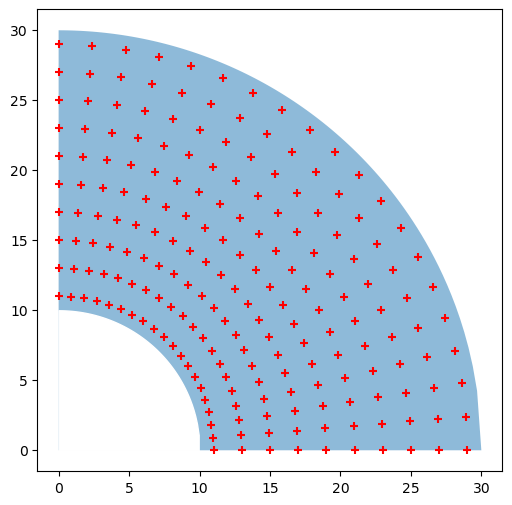

In [147]:
import numpy as np
import matplotlib.pyplot as plt

l1, l2 = 20, 10
f1 = lambda x: np.sqrt((l1 + l2) ** 2 - x**2)
f2 = lambda x: np.sqrt(l2**2 - x**2)

plt.figure(figsize=(6,6))
x = np.linspace(0, l1+l2, 100)
plt.fill_between(x, f1(x), 0, alpha=0.5)
x = np.linspace(0, 12, 100)
plt.fill_between(x, f2(x), 0, color="white")

t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 +1, l1+l2+1,2)

X = l.reshape(-1, 1) * np.cos(t)
Y = l.reshape(-1, 1) * np.sin(t)
plt.scatter(X.ravel(), Y.ravel(), marker="+", color = "red")

plt.savefig('plot_31.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
import numpy as np
from scipy.special import gammainc
def randsphere(center, radius, n_per_sphere):
#generate random numbers in a n−dimensional sphere i.e. in 2D, it is in a circle
r = radius
ndim = center.size
x = np.random.normal(size=(n_per_sphere, ndim))
ssq = np.sum(x ** 2, axis=1)
fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim)/np.sqrt(ssq)
frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
p = center + np.multiply(x, frtiled)
return p
p = randsphere(np.array([0, 0], 30, 1000)
               
p = p[(p[:,0] > 0) & (p[:,1] > 0), :] # 第一象限
d = np.sum(p**2, axis=1)
p = p[d >= radius_in**2, :] # 扇形內

IndentationError: expected an indented block (4324483.py, line 5)

In [29]:
import numpy as np
from scipy.special import gammainc

def randsphere(center, radius, n_per_sphere):
    # generate random numbers in an n-dimensional sphere, i.e., in 2D, it is in a circle
    r = radius
    ndim = center.size
    x = np.random.normal(size=(n_per_sphere, ndim))
    ssq = np.sum(x ** 2, axis=1)
    fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim) / np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
    p = center + np.multiply(x, frtiled)
    return p

#randsphere 函數，以中心為 (0, 0)、半徑為 30，生成 1000 個隨機點 p
p = randsphere(np.array([0, 0]), 30, 1000)
               
#p = p[(p[:,0] > 0) & (p[:,1] > 0), :] 篩選出位於第一象限的點，即 x 和 y 都大於 0 的點
p = p[(p[:,0] > 0) & (p[:,1] > 0), :]  # Filter points in the first quadrant
radius_in = 15  # Define the inner radius here #內部半徑
d = np.sum(p**2, axis=1) # 計算每個點到原點的距離的平方
#在篩選已生成的隨機點 p 中僅保留距離原點的平方大於等於內部半徑 radius_in 平方的點
p = p[d >= radius_in**2, :]  # Filter points within the sector #篩選出位於內部半徑和外部半徑之間的點，即特定區域內的點

print(p)


[[22.49131207 18.25598712]
 [13.02222975 15.22425509]
 [22.02877772  0.52027109]
 [23.81658612  2.63008017]
 [16.19002331 11.56365022]
 [13.76300055  7.5927542 ]
 [15.67255112 14.13176912]
 [27.64450622  5.17474261]
 [ 5.19383661 17.76520768]
 [19.16746188 14.05520163]
 [11.1846264  16.64392183]
 [ 7.78963904 25.19965281]
 [16.09766353 15.1995242 ]
 [15.53874125 14.03153642]
 [22.88627    14.37956151]
 [ 9.57959036 23.25109136]
 [23.23739189 17.79114506]
 [ 7.32503763 22.60212756]
 [12.6345637  15.81592416]
 [ 3.50793999 19.75299026]
 [28.90324109  4.49625576]
 [26.66703465  8.59440012]
 [14.60008134 15.77290949]
 [24.75590765  1.82352677]
 [ 2.6731803  18.59307432]
 [18.95994691 15.554658  ]
 [10.67147813 26.41354971]
 [16.77624889  3.69563357]
 [ 5.25612841 20.14477714]
 [15.07419276 15.70479871]
 [17.87536236 16.48894213]
 [27.52146501  7.82810319]
 [15.32010911  7.99332352]
 [ 9.73171884 23.2283784 ]
 [13.00662334 20.89043958]
 [18.99032276 21.23021091]
 [ 0.47473822 26.3937231 ]
 

In [35]:
pip install neurolab


     -------------------------------------- 645.3/645.3 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for neurolab: filename=neurolab-0.3.5-py3-none-any.whl size=22200 sha256=7febd8250b7a7784e54112ff4dcc580428bc111eb41b664bb78c64b01baea1bd
  Stored in directory: c:\users\chienyu\appdata\local\pip\cache\wheels\86\89\37\568dc787534467a6a69d8f24267bf3058764c785db3bb2ebf3
Successfully built neurolab
Note: you may need to restart the kernel to use updated packages.


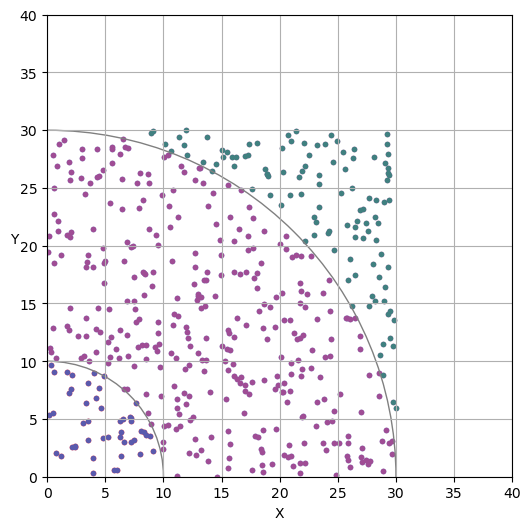

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# 生成隨機點
np.random.seed(0)
p = np.random.rand(500, 2) * 30  # 生成1000個點在範圍[0, 30)內

# 內外半徑
radius_in_1 = 10
radius_in_2 = 30

# 選取第一象限的點
p_first_quadrant = p[(p[:, 0] > 0) & (p[:, 1] > 0)]

# 計算距離原點的平方
distance_sq = np.sum(p_first_quadrant**2, axis=1)

# 選取第一象限內、距離原點小於內部半徑的點
p_inner_circle_1 = p_first_quadrant[distance_sq < radius_in_1**2]
p_inner_circle_2 = p_first_quadrant[distance_sq < radius_in_2**2]

# 選取第一象限內、距離原點大於內部半徑的點
p_outside_inner_circle_1 = p_first_quadrant[distance_sq >= radius_in_1**2]
p_outside_inner_circle_2 = p_first_quadrant[distance_sq >= radius_in_2**2]

# 繪製第一象限的隨機點（兩個圓內的點以紅色呈現，圓外的點以藍色呈現）
plt.figure(figsize=(6, 6))
plt.scatter(p_inner_circle_1[:, 0], p_inner_circle_1[:, 1], marker='.', color='red', label='Inside Inner Circle 1')
plt.scatter(p_inner_circle_2[:, 0], p_inner_circle_2[:, 1], marker='.', color='#5A5AAD', label='Inside Inner Circle 2')
plt.scatter(p_outside_inner_circle_1[:, 0], p_outside_inner_circle_1[:, 1], marker='.', color='#9F4D95', label='Outside Inner Circle 1')
plt.scatter(p_outside_inner_circle_2[:, 0], p_outside_inner_circle_2[:, 1], marker='.', color='#408080', label='Outside Inner Circle 2')

# 繪製內部半徑
inner_circle_1 = plt.Circle((0, 0), radius_in_1, color='gray', fill=False, linestyle='-', label='Inner Radius 1')
inner_circle_2 = plt.Circle((0, 0), radius_in_2, color='gray', fill=False, linestyle='-', label='Inner Radius 2')
plt.gca().add_patch(inner_circle_1)
plt.gca().add_patch(inner_circle_2)

plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('X')
plt.ylabel('Y', rotation=0)

#plt.legend()
plt.grid(True)
plt.savefig('plot_32.png', dpi=300, bbox_inches='tight')
plt.show()


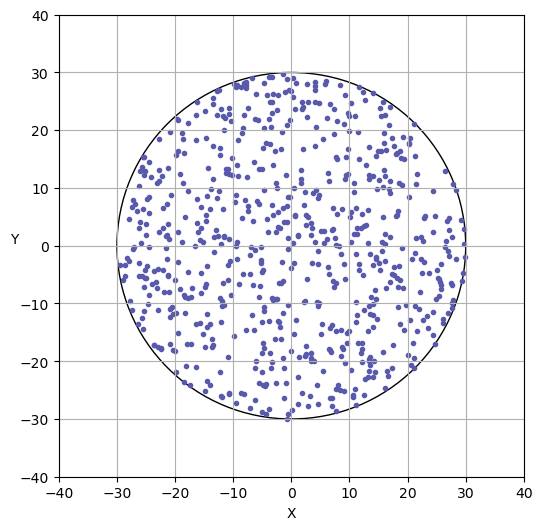

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# 定義生成在圓內均勻分布的函數
def generate_uniform_points_in_circle(radius, num_points):
    r = radius * np.sqrt(np.random.rand(num_points))
    theta = np.random.rand(num_points) * 2 * np.pi
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

# 生成均勻分布的點
radius = 30
num_points = 700
x, y = generate_uniform_points_in_circle(radius, num_points)

# 繪製圖像
fig, ax = plt.subplots(figsize=(6, 6))

# 繪製圓形框架
circle = plt.Circle((0, 0), radius, color='black', fill=False, linestyle='-', label='Circle Boundary')
ax.add_patch(circle)

# 繪製均勻分布的點
plt.scatter(x, y, color='#5A5AAD', marker='.', label='Uniform Points within Circle')

plt.xlim(-40, 40)
plt.ylim(-40, 40)
plt.xlabel('X')
plt.ylabel('Y',rotation=0)
plt.grid(True)
plt.savefig('plot_33.png', dpi=300, bbox_inches='tight')
plt.show()


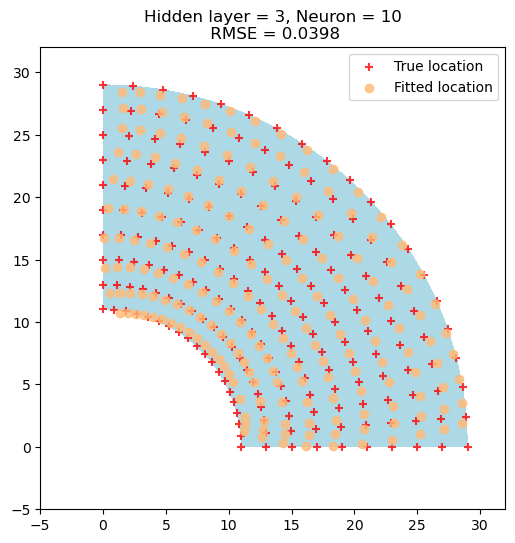

In [218]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

l1, l2 = 20, 10
f1 = lambda x: np.sqrt((l1 + l2) ** 2 - x ** 2)
f2 = lambda x: np.sqrt(l2 ** 2 - x ** 2)

t = np.linspace(0, np.pi / 2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)

X = l.reshape(-1, 1) * np.cos(t)
Y = l.reshape(-1, 1) * np.sin(t)

theta2 = np.arccos((X.ravel() ** 2 + Y.ravel() ** 2 - l1 ** 2 - l2 ** 2) / (2 * l1 * l2))
theta1 = np.arctan(Y.ravel() / X.ravel()) - np.arctan(l2 * np.sin(theta2) / (l1 + l2 * np.cos(theta2)))

InputX = np.c_[X.ravel(), Y.ravel()]
OutputY = np.c_[theta1, theta2]

hidden_layers = [(10,), (10, 10,), (10, 10, 10,), (10, 10, 10, 10,)]
number = [1, 2, 3, 4]
rmses = []

mlp_reg = MLPRegressor(max_iter=8000, solver='lbfgs', hidden_layer_sizes=hidden_layers[2], verbose=False,
                       activation='logistic', tol=1e-6, random_state=0)
mlp_reg.fit(InputX, OutputY)
OutputY_hat = mlp_reg.predict(InputX)
theta1_hat, theta2_hat = OutputY_hat[:, 0], OutputY_hat[:, 1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat + theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat + theta2_hat)

rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
rmses.append(rmse)

plt.figure(figsize=(6, 6))
plt.contourf(X, Y, theta1.reshape(X.shape), colors='lightblue')
plt.scatter(X, Y, color='r', marker='+', alpha=0.8, label='True location')
plt.scatter(x_hat, y_hat, color='#FFBB77', marker='o', alpha=0.8, label='Fitted location')
plt.xlim(-5, 32)
plt.ylim(-5, 32)
plt.title(f'Hidden layer = 3, Neuron = 10\n RMSE = {rmse:.4f}')
plt.legend()

plt.savefig('plot_47.png', dpi=300, bbox_inches='tight')
plt.show()


R square is 0.9909
Root Mean square error is 0.0591
loss function is 0.001887831766621625
number of iterations: 1720
Sum of Squared Error (SSE) is 0.0035


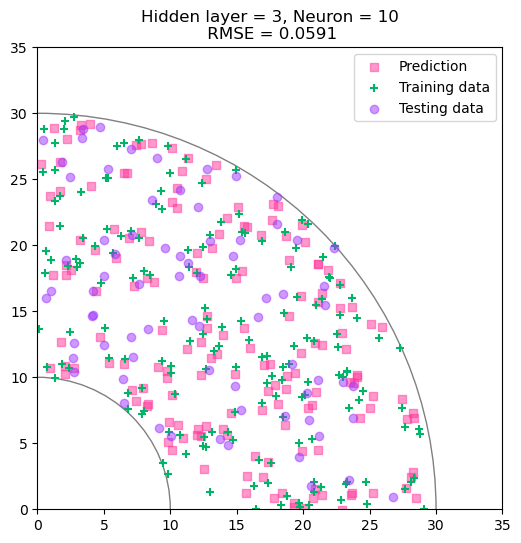

In [222]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.special import gammainc
import matplotlib.pyplot as plt

radius_in_1 = 10
radius_in_2 = 30

def randsphere(center, radius_out, n_per_sphere):
    r = radius_out
    ndim = center.size
    x = np.random.normal(size=(n_per_sphere, ndim))
    ssq = np.sum(x ** 2, axis=1)
    fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim) / np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
    p = center + np.multiply(x, frtiled)
    return p

# Preaper training data (input)
p = randsphere(np.array([0, 0]), 30, 1000)
p = p[(p[:,0] > 0) & (p[:,1] > 0), :] # 第一象限
d = np.sum(p**2, axis=1)
p = p[d >= radius_in_1**2, :] 

X = p[:,0]
Y = p[:,1]

#分割資料
def split(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split(X, Y)
l1, l2 = 20, 10

# Preaper training data (output)
theta2 = np.arccos((X_train.ravel()**2 + y_train.ravel()**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train.ravel()/X_train.ravel()) - np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))

InputX = np.c_[X_train.ravel(), y_train.ravel()]
OutputY = np.c_[theta1, theta2]
hidden_layers = (10, 10, 10,) 
solver = 'lbfgs' 
mlp_reg = MLPRegressor(
    max_iter=int(1e8), 
    solver=solver, 
    hidden_layer_sizes=hidden_layers,
    verbose=False,
    activation='logistic',
    tol=1e-6, random_state=0)
mlp_reg.fit(InputX, OutputY)
OutputY_hat = mlp_reg.predict(InputX)
theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)

R_square = mlp_reg.score(InputX, OutputY)
print('R square is {:.4f}'.format(R_square))
rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
print('Root Mean square error is {:.4f}'.format(rmse))
lossfunc = mlp_reg.loss_
print('loss function is {}'.format(lossfunc))
print("number of iterations: {}".format(mlp_reg.n_iter_))

#show the predicted data with the training data
plt.figure(figsize=(6,6))

# 繪製內部半徑
inner_circle_1 = plt.Circle((0, 0), radius_in_1, color='gray', fill=False, linestyle='-')
inner_circle_2 = plt.Circle((0, 0), radius_in_2, color='gray', fill=False, linestyle='-')
plt.gca().add_patch(inner_circle_1)
plt.gca().add_patch(inner_circle_2)

SSE = mean_squared_error(OutputY, OutputY_hat)
print('Sum of Squared Error (SSE) is {:.4f}'.format(SSE))

plt.title(f'Hidden layer = 3, Neuron = 10\n RMSE = {rmse:.4f}')
plt.scatter(x_hat, y_hat, color="#FF359A", marker="s", alpha=0.5, label="Prediction")
plt.scatter(X_train.ravel(), y_train.ravel(), color="#01B468", marker="+", label="Training data")
plt.scatter(X_test.ravel(), y_test.ravel(), color="#9F35FF", alpha=0.5, marker="o", label="Testing data")
plt.xlim(0, 35)
plt.ylim(0, 35)
plt.legend()
plt.savefig('plot_48.png', dpi=300, bbox_inches='tight')
plt.show()


R square is 0.9978
Root Mean square error is 0.0277
loss function is 0.00046321257664206646
number of iterations: 5489
訓練集的樣本數目為: 150
Sum of Squared Error (SSE) is 0.0008


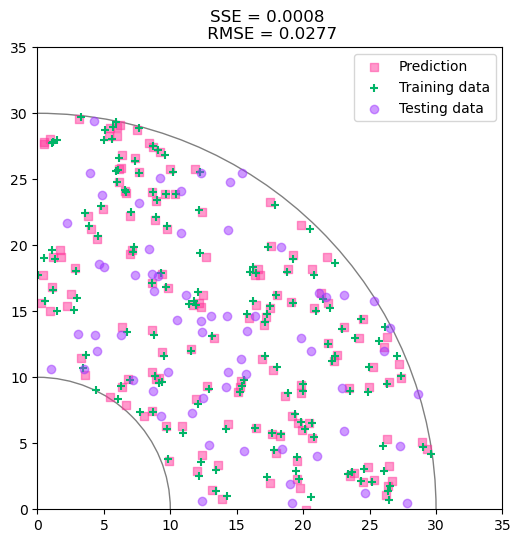

In [238]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.special import gammainc
import matplotlib.pyplot as plt

radius_in_1 = 10
radius_in_2 = 30

def randsphere(center, radius_out, n_per_sphere):
    r = radius_out
    ndim = center.size
    x = np.random.normal(size=(n_per_sphere, ndim))
    ssq = np.sum(x ** 2, axis=1)
    fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim) / np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
    p = center + np.multiply(x, frtiled)
    return p

# Preaper training data (input)
p = randsphere(np.array([0, 0]), 30, 1000)
p = p[(p[:,0] > 0) & (p[:,1] > 0), :] # 第一象限
d = np.sum(p**2, axis=1)
p = p[d >= radius_in_1**2, :] 

X = p[:,0]
Y = p[:,1]

#分割資料
def split(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split(X, Y)
l1, l2 = 20, 10

# Preaper training data (output)
theta2 = np.arccos((X_train.ravel()**2 + y_train.ravel()**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train.ravel()/X_train.ravel()) - np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))

InputX = np.c_[X_train.ravel(), y_train.ravel()]
OutputY = np.c_[theta1, theta2]
hidden_layers = (40,) 
solver = 'lbfgs' 
mlp_reg = MLPRegressor(
    max_iter=int(1e8), 
    solver=solver, 
    hidden_layer_sizes=hidden_layers,
    verbose=False,
    activation='logistic',
    tol=1e-6, random_state=0)
mlp_reg.fit(InputX, OutputY)
OutputY_hat = mlp_reg.predict(InputX)
theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)

R_square = mlp_reg.score(InputX, OutputY)
print('R square is {:.4f}'.format(R_square))
rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
print('Root Mean square error is {:.4f}'.format(rmse))
lossfunc = mlp_reg.loss_
print('loss function is {}'.format(lossfunc))
print("number of iterations: {}".format(mlp_reg.n_iter_))

#show the predicted data with the training data
plt.figure(figsize=(6,6))

# 繪製內部半徑
inner_circle_1 = plt.Circle((0, 0), radius_in_1, color='gray', fill=False, linestyle='-')
inner_circle_2 = plt.Circle((0, 0), radius_in_2, color='gray', fill=False, linestyle='-')
plt.gca().add_patch(inner_circle_1)
plt.gca().add_patch(inner_circle_2)

sample_count = X_train.shape[0]
print("訓練集的樣本數目為:", sample_count)


SSE = mean_squared_error(OutputY, OutputY_hat)
print('Sum of Squared Error (SSE) is {:.4f}'.format(SSE))

plt.title(f'SSE = {SSE:.4f} \n RMSE = {rmse:.4f}')
plt.scatter(x_hat, y_hat, color="#FF359A", marker="s", alpha=0.5, label="Prediction")
plt.scatter(X_train.ravel(), y_train.ravel(), color="#01B468", marker="+", label="Training data")
plt.scatter(X_test.ravel(), y_test.ravel(), color="#9F35FF", alpha=0.5, marker="o", label="Testing data")
plt.xlim(0, 35)
plt.ylim(0, 35)
plt.legend()
plt.savefig('plot_34.png', dpi=300, bbox_inches='tight')
plt.show()


R square is 0.9978
Root Mean square error is 0.0281
loss function is 0.00048294126082693966
number of iterations: 4704
Sum of Squared Error (SSE) is 0.0008


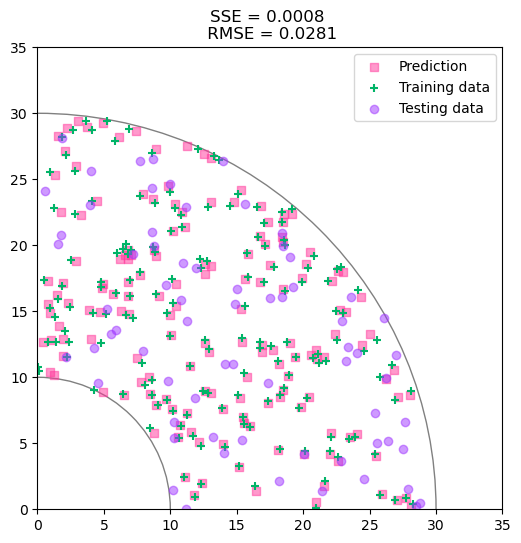

In [178]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.special import gammainc
import matplotlib.pyplot as plt

radius_in_1 = 10
radius_in_2 = 30

def randsphere(center, radius_out, n_per_sphere):
    r = radius_out
    ndim = center.size
    x = np.random.normal(size=(n_per_sphere, ndim))
    ssq = np.sum(x ** 2, axis=1)
    fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim) / np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
    p = center + np.multiply(x, frtiled)
    return p

# Preaper training data (input)
p = randsphere(np.array([0, 0]), 30, 1000)
p = p[(p[:,0] > 0) & (p[:,1] > 0), :] # 第一象限
d = np.sum(p**2, axis=1)
p = p[d >= radius_in_1**2, :] 

X = p[:,0]
Y = p[:,1]

#分割資料
def split(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split(X, Y)
l1, l2 = 20, 10

# Preaper training data (output)
theta2 = np.arccos((X_train.ravel()**2 + y_train.ravel()**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train.ravel()/X_train.ravel()) - np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))

InputX = np.c_[X_train.ravel(), y_train.ravel()]
OutputY = np.c_[theta1, theta2]
hidden_layers = (80,) 
solver = 'lbfgs' 
mlp_reg = MLPRegressor(
    max_iter=int(1e8), 
    solver=solver, 
    hidden_layer_sizes=hidden_layers,
    verbose=False,
    activation='logistic',
    tol=1e-6, random_state=0)
mlp_reg.fit(InputX, OutputY)
OutputY_hat = mlp_reg.predict(InputX)
theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)

R_square = mlp_reg.score(InputX, OutputY)
print('R square is {:.4f}'.format(R_square))
rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
print('Root Mean square error is {:.4f}'.format(rmse))
lossfunc = mlp_reg.loss_
print('loss function is {}'.format(lossfunc))
print("number of iterations: {}".format(mlp_reg.n_iter_))

#show the predicted data with the training data
plt.figure(figsize=(6,6))

# 繪製內部半徑
inner_circle_1 = plt.Circle((0, 0), radius_in_1, color='gray', fill=False, linestyle='-')
inner_circle_2 = plt.Circle((0, 0), radius_in_2, color='gray', fill=False, linestyle='-')
plt.gca().add_patch(inner_circle_1)
plt.gca().add_patch(inner_circle_2)

SSE = mean_squared_error(OutputY, OutputY_hat)
print('Sum of Squared Error (SSE) is {:.4f}'.format(SSE))

plt.title(f'SSE = {SSE:.4f} \n RMSE = {rmse:.4f}')
plt.scatter(x_hat, y_hat, color="#FF359A", marker="s", alpha=0.5, label="Prediction")
plt.scatter(X_train.ravel(), y_train.ravel(), color="#01B468", marker="+", label="Training data")
plt.scatter(X_test.ravel(), y_test.ravel(), color="#9F35FF", alpha=0.5, marker="o", label="Testing data")
plt.xlim(0, 35)
plt.ylim(0, 35)
plt.legend()
plt.savefig('plot_36.png', dpi=300, bbox_inches='tight')
plt.show()


R square is 0.9988
Root Mean square error is 0.0223
loss function is 0.0004036237979707289
number of iterations: 1287
Sum of Squared Error (SSE) is 0.0005


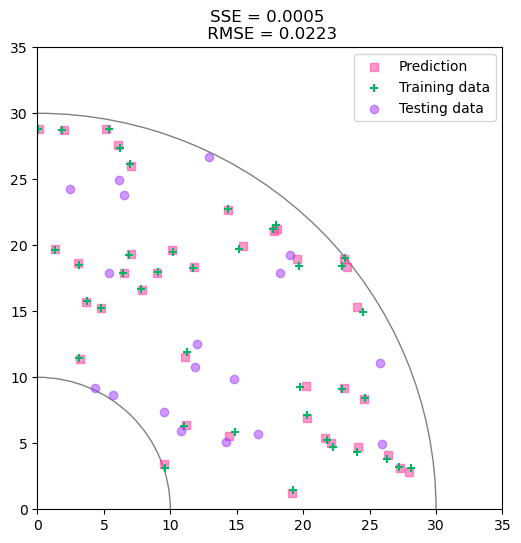

In [183]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.special import gammainc
import matplotlib.pyplot as plt

radius_in_1 = 10
radius_in_2 = 30

def randsphere(center, radius_out, n_per_sphere):
    r = radius_out
    ndim = center.size
    x = np.random.normal(size=(n_per_sphere, ndim))
    ssq = np.sum(x ** 2, axis=1)
    fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim) / np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
    p = center + np.multiply(x, frtiled)
    return p

# Preaper training data (input)
p = randsphere(np.array([0, 0]), 30, 300)
p = p[(p[:,0] > 0) & (p[:,1] > 0), :] # 第一象限
d = np.sum(p**2, axis=1)
p = p[d >= radius_in_1**2, :] 

X = p[:,0]
Y = p[:,1]

#分割資料
def split(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split(X, Y)
l1, l2 = 20, 10

# Preaper training data (output)
theta2 = np.arccos((X_train.ravel()**2 + y_train.ravel()**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train.ravel()/X_train.ravel()) - np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))

InputX = np.c_[X_train.ravel(), y_train.ravel()]
OutputY = np.c_[theta1, theta2]
hidden_layers = (80,) 
solver = 'lbfgs' 
mlp_reg = MLPRegressor(
    max_iter=int(1e8), 
    solver=solver, 
    hidden_layer_sizes=hidden_layers,
    verbose=False,
    activation='logistic',
    tol=1e-6, random_state=0)
mlp_reg.fit(InputX, OutputY)
OutputY_hat = mlp_reg.predict(InputX)
theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)

R_square = mlp_reg.score(InputX, OutputY)
print('R square is {:.4f}'.format(R_square))
rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
print('Root Mean square error is {:.4f}'.format(rmse))
lossfunc = mlp_reg.loss_
print('loss function is {}'.format(lossfunc))
print("number of iterations: {}".format(mlp_reg.n_iter_))

#show the predicted data with the training data
plt.figure(figsize=(6,6))

# 繪製內部半徑
inner_circle_1 = plt.Circle((0, 0), radius_in_1, color='gray', fill=False, linestyle='-')
inner_circle_2 = plt.Circle((0, 0), radius_in_2, color='gray', fill=False, linestyle='-')
plt.gca().add_patch(inner_circle_1)
plt.gca().add_patch(inner_circle_2)

SSE = mean_squared_error(OutputY, OutputY_hat)
print('Sum of Squared Error (SSE) is {:.4f}'.format(SSE))

plt.title(f'SSE = {SSE:.4f} \n RMSE = {rmse:.4f}')
plt.scatter(x_hat, y_hat, color="#FF359A", marker="s", alpha=0.5, label="Prediction")
plt.scatter(X_train.ravel(), y_train.ravel(), color="#01B468", marker="+", label="Training data")
plt.scatter(X_test.ravel(), y_test.ravel(), color="#9F35FF", alpha=0.5, marker="o", label="Testing data")
plt.xlim(0, 35)
plt.ylim(0, 35)
plt.legend()
plt.savefig('plot_37.png', dpi=300, bbox_inches='tight')
plt.show()


R square is 0.9952
Root Mean square error is 0.0406
loss function is 0.0010086459024881342
number of iterations: 1016
Sum of Squared Error (SSE) is 0.0017


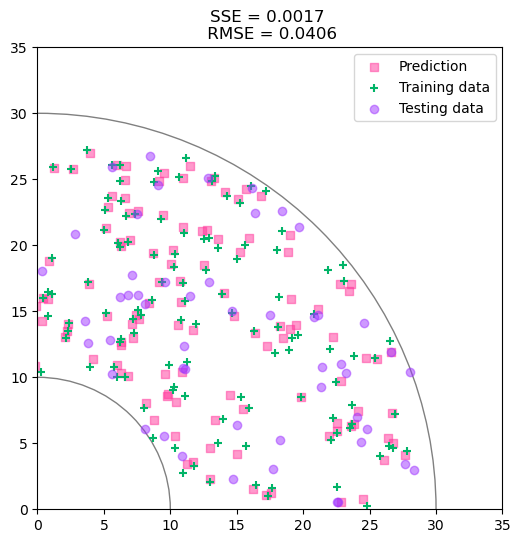

In [184]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.special import gammainc
import matplotlib.pyplot as plt

radius_in_1 = 10
radius_in_2 = 30

def randsphere(center, radius_out, n_per_sphere):
    r = radius_out
    ndim = center.size
    x = np.random.normal(size=(n_per_sphere, ndim))
    ssq = np.sum(x ** 2, axis=1)
    fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim) / np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
    p = center + np.multiply(x, frtiled)
    return p

# Preaper training data (input)
p = randsphere(np.array([0, 0]), 30, 800)
p = p[(p[:,0] > 0) & (p[:,1] > 0), :] # 第一象限
d = np.sum(p**2, axis=1)
p = p[d >= radius_in_1**2, :] 

X = p[:,0]
Y = p[:,1]

#分割資料
def split(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split(X, Y)
l1, l2 = 20, 10

# Preaper training data (output)
theta2 = np.arccos((X_train.ravel()**2 + y_train.ravel()**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train.ravel()/X_train.ravel()) - np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))

InputX = np.c_[X_train.ravel(), y_train.ravel()]
OutputY = np.c_[theta1, theta2]
hidden_layers = (80,) 
solver = 'lbfgs' 
mlp_reg = MLPRegressor(
    max_iter=int(1e8), 
    solver=solver, 
    hidden_layer_sizes=hidden_layers,
    verbose=False,
    activation='logistic',
    tol=1e-6, random_state=0)
mlp_reg.fit(InputX, OutputY)
OutputY_hat = mlp_reg.predict(InputX)
theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)

R_square = mlp_reg.score(InputX, OutputY)
print('R square is {:.4f}'.format(R_square))
rmse = np.sqrt(mean_squared_error(OutputY, OutputY_hat))
print('Root Mean square error is {:.4f}'.format(rmse))
lossfunc = mlp_reg.loss_
print('loss function is {}'.format(lossfunc))
print("number of iterations: {}".format(mlp_reg.n_iter_))

#show the predicted data with the training data
plt.figure(figsize=(6,6))

# 繪製內部半徑
inner_circle_1 = plt.Circle((0, 0), radius_in_1, color='gray', fill=False, linestyle='-')
inner_circle_2 = plt.Circle((0, 0), radius_in_2, color='gray', fill=False, linestyle='-')
plt.gca().add_patch(inner_circle_1)
plt.gca().add_patch(inner_circle_2)

SSE = mean_squared_error(OutputY, OutputY_hat)
print('Sum of Squared Error (SSE) is {:.4f}'.format(SSE))

plt.title(f'SSE = {SSE:.4f} \n RMSE = {rmse:.4f}')
plt.scatter(x_hat, y_hat, color="#FF359A", marker="s", alpha=0.5, label="Prediction")
plt.scatter(X_train.ravel(), y_train.ravel(), color="#01B468", marker="+", label="Training data")
plt.scatter(X_test.ravel(), y_test.ravel(), color="#9F35FF", alpha=0.5, marker="o", label="Testing data")
plt.xlim(0, 35)
plt.ylim(0, 35)
plt.legend()
plt.savefig('plot_38.png', dpi=300, bbox_inches='tight')
plt.show()


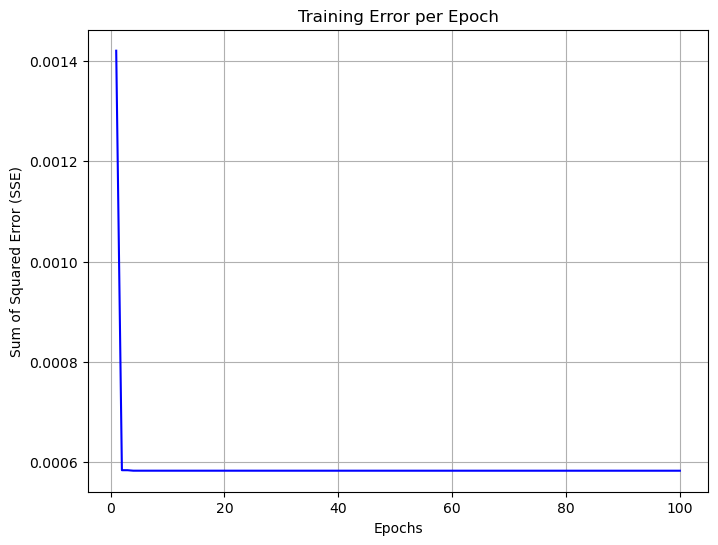

In [186]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 其他程式碼部分保持不變

mlp_reg = MLPRegressor(
    max_iter=int(1e8),
    solver='lbfgs',
    hidden_layer_sizes=(80,), 
    verbose=False,
    activation='logistic',
    tol=1e-6,
    random_state=0
)

epochs = 100
losses = []

for epoch in range(epochs):
    mlp_reg.partial_fit(InputX, OutputY)  
    OutputY_hat = mlp_reg.predict(InputX)
    loss = mean_squared_error(OutputY, OutputY_hat)
    losses.append(loss)

# 繪製損失值變化曲線
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), losses, linestyle='-', color='b')
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Training Error per Epoch')
plt.grid(True)
plt.show()


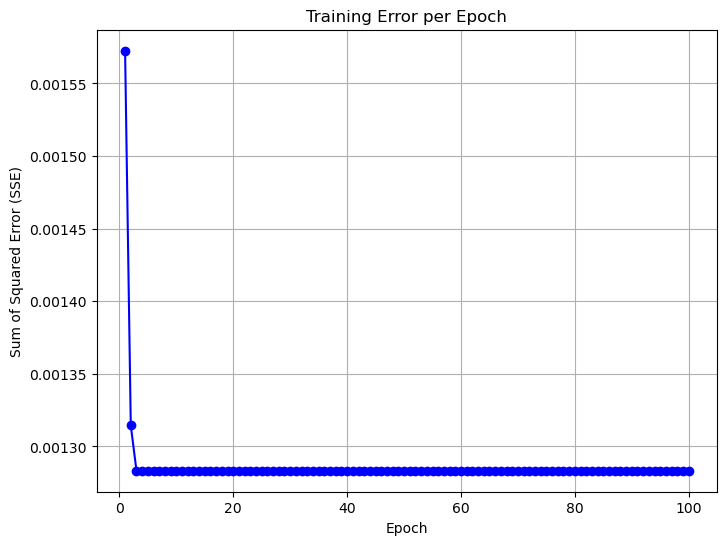

In [159]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.special import gammainc
import matplotlib.pyplot as plt

radius_in_1 = 10
radius_in_2 = 30

def randsphere(center, radius_out, n_per_sphere):
    r = radius_out
    ndim = center.size
    x = np.random.normal(size=(n_per_sphere, ndim))
    ssq = np.sum(x ** 2, axis=1)
    fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim) / np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
    p = center + np.multiply(x, frtiled)
    return p

# Prepare training data (input)
p = randsphere(np.array([0, 0]), 30, 1000)
p = p[(p[:,0] > 0) & (p[:,1] > 0), :]  # 第一象限
d = np.sum(p**2, axis=1)
p = p[d >= radius_in_1**2, :] 

X = p[:,0]
Y = p[:,1]

# Split data
def split(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split(X, Y)
l1, l2 = 20, 10

# Prepare training data (output)
theta2 = np.arccos((X_train.ravel()**2 + y_train.ravel()**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train.ravel()/X_train.ravel()) - np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))

InputX = np.c_[X_train.ravel(), y_train.ravel()]
OutputY = np.c_[theta1, theta2]

# Check for NaN values and handle them if present
if np.isnan(OutputY).any():
    nan_indices = np.argwhere(np.isnan(OutputY))
    OutputY = np.delete(OutputY, nan_indices, axis=0)
    InputX = np.delete(InputX, nan_indices, axis=0)

# Create and train the model
hidden_layers = (80,)
solver = 'lbfgs' 
mlp_reg = MLPRegressor(
    max_iter=int(1e8), 
    solver=solver, 
    hidden_layer_sizes=hidden_layers,
    verbose=False,
    activation='logistic',
    tol=1e-6, random_state=0)

epochs = 100  # 设置迭代次数
losses = []   # 用于保存每个 Epoch 的损失值

for epoch in range(epochs):
    mlp_reg.partial_fit(InputX, OutputY)  # Use partial_fit for online learning
    OutputY_hat = mlp_reg.predict(InputX)
    loss = mean_squared_error(OutputY, OutputY_hat)
    losses.append(loss)

# 画出损失值的变化曲线
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), losses, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Training Error per Epoch')
plt.grid(True)
plt.show()


In [112]:
import pickle
import os
from sklearn.datasets import fetch_openml

data_file = "digits.pkl"
#check if data file exists
if os.path.exists(data_file):
    #load data from file
    with open(data_file, "rb") as f:
        data = pickle.load(f)
else:
    #load data from internet
    data = fetch_openml('mnist_784', version=1, parser="auto")
    #save data to file
    with open(data_file, "wb") as f:
        pickle.dump(data, f)
        
X, y = data.data, data.target

In [9]:
from sklearn.datasets import fetch_openml
from sklearn import datasets

X, y = fetch_openml('mnist_784', version = 1, return_X_y = True, parser = 'auto')

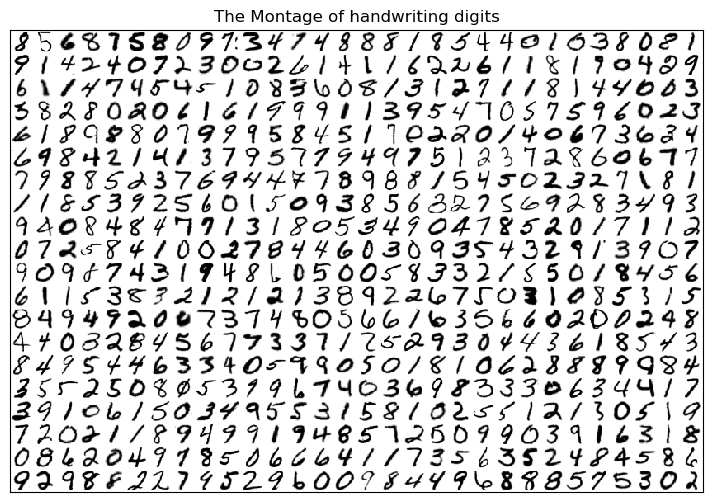

In [229]:
from scipy.io import loadmat
#data_dir = 'C:/Users/ChienYu/Downloads/'
D = loadmat('C:/Users/ChienYu/Downloads/digits_train/Digits_train.mat')
# D.keys()
X = D['X'] # images
y = D['y'] # labels: single  output in 0-9

plt.figure(figsize = (9,6))
# prepare and diaplay a montage of digit images
n, m = 20, 30 # A n x m montage (total mn images)
sz = np.sqrt(X.shape[1]).astype('int') # image size sz x sz
M = np.zeros((m*sz, n*sz)) # montage image
A = X[:m*n,:] # show the first nm images
# Arrange images to form a montage
for i in range(m) :
    for j in range(n) :
        M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = A[i*n+j,:].reshape(sz, sz)
plt.imshow(M.T, cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.title('The Montage of handwriting digits')
plt.savefig('plot_39.png', dpi=300, bbox_inches='tight')
plt.show()


In [114]:
import matplotlib.pyplot as plt

import numpy as np



def show_montage(X, n, m, h, w):

    '''

    X: image matrix in which each column represents an image

    n, m: image size n x m

    h, w : create an h x w montage image with figsize = (w,h)

    '''

    fig, axes = plt.subplots(h, w, figsize=(w, h))

    if X.shape[1] < w * h: # 影像張數不到 w x h 張，用 0 向量補齊     

        X = np.c_[X, np.zeros((X.shape[0], w*h-X.shape[1]))]

    for i, ax in enumerate(axes.flat):

        ax.imshow(np.array(X)[:,i].reshape(m, n), cmap='gray')

        ax.set_xticks([])

        ax.set_yticks([])

    plt.show()

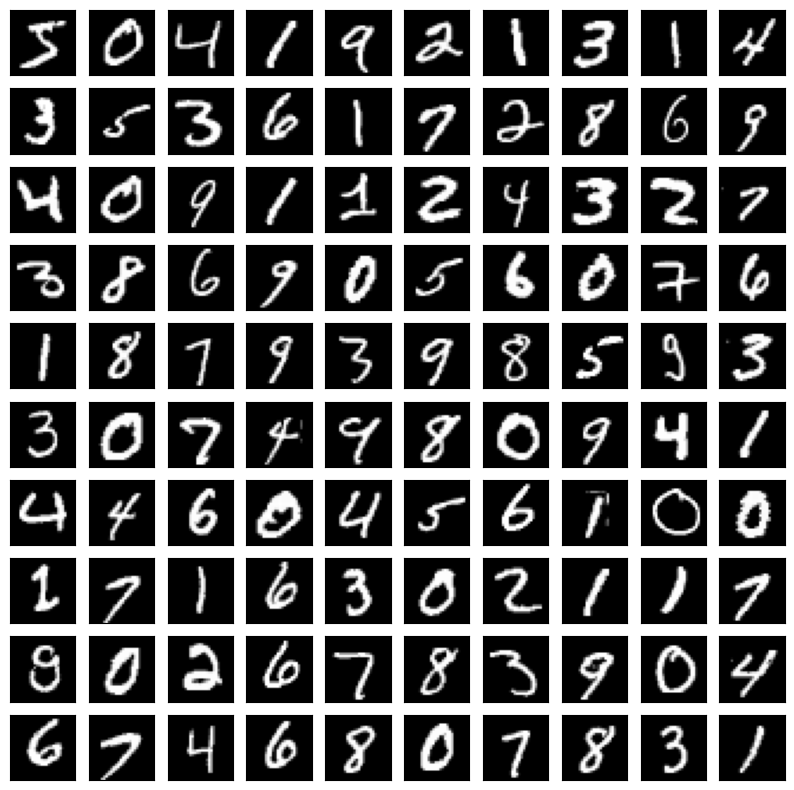

In [115]:
show_montage(np.array(X)[:1000, :].T, 28, 28, 10 ,10)
# np.array(X)[:1000, :].T 是從 MNIST 數據集中選取前 1000 張圖像，然後進行轉置
# 28 和 28 分別代表這些圖像的寬和高
# 指定要以 10 行 10 列的方式展示這些圖像
# 目的是以一定的排列方式展示 MNIST 數據集的前 1000 張圖像

Iteration 1, loss = 2.33383885
Iteration 2, loss = 2.24778021
Iteration 3, loss = 2.17717632
Iteration 4, loss = 2.11567761
Iteration 5, loss = 2.05763188
Iteration 6, loss = 2.00288299
Iteration 7, loss = 1.94948432
Iteration 8, loss = 1.89992217
Iteration 9, loss = 1.85316013
Iteration 10, loss = 1.80797556
Iteration 11, loss = 1.76597807
Iteration 12, loss = 1.72503085
Iteration 13, loss = 1.68621970
Iteration 14, loss = 1.64849950
Iteration 15, loss = 1.61208403
Iteration 16, loss = 1.57683267
Iteration 17, loss = 1.54257532
Iteration 18, loss = 1.50981766
Iteration 19, loss = 1.47737654
Iteration 20, loss = 1.44574922
Iteration 21, loss = 1.41460582
Iteration 22, loss = 1.38471846
Iteration 23, loss = 1.35523382
Iteration 24, loss = 1.32644036
Iteration 25, loss = 1.29845606
Iteration 26, loss = 1.27117794
Iteration 27, loss = 1.24415945
Iteration 28, loss = 1.21802253
Iteration 29, loss = 1.19244918
Iteration 30, loss = 1.16716197
Iteration 31, loss = 1.14304540
Iteration 32, los

<Figure size 800x800 with 0 Axes>

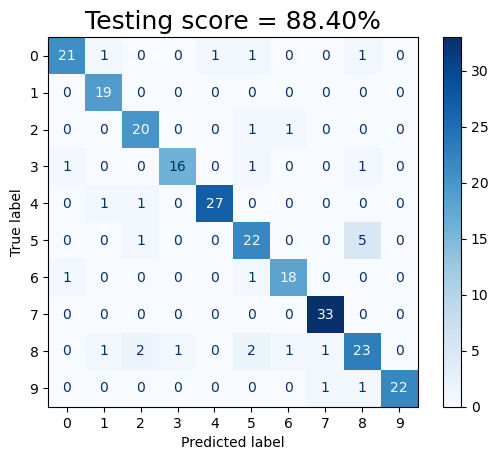

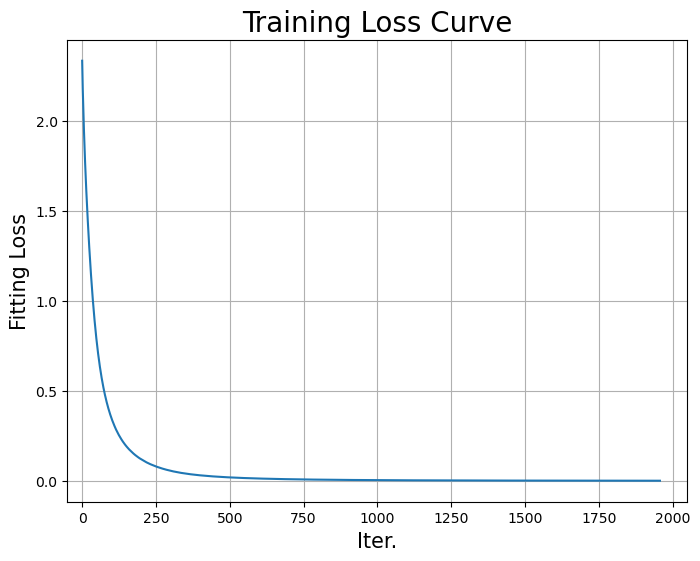

In [210]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(30)
D = loadmat('C:/Users/ChienYu/Downloads/digits_train/Digits_train.mat')
# 因為手寫數字檔以Matlab的檔案格式儲存，因採用scipy.ip的loadmat()函數讀取
# D.keys()
X = D['X'] # images
y = D['y'] # labels: single output in 0~9


from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
        
# prepare data
X_train, X_test, y_train, y_test = train_test_split(X/255, y.ravel(), test_size = 0.25)

# ------setup and run ANN------
hidden_layers = (30,) # one hidden layer

# solver = ’sgd’ # not efficient, need more tuning
# solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
ANN = MLPClassifier(max_iter = 10000,
                    solver = solver,
                    hidden_layer_sizes = hidden_layers,
                    verbose = True,
                    activation = 'logistic', # default activation = ’relu’
                    tol = 1e-6,
                    random_state = 0
                    )
ANN.fit(X_train, y_train)
# ------setup and run ANN------

y_train_hat = ANN.predict(X_train)
y_test_hat = ANN.predict(X_test)
print('accuracy for training data: {:.2f}%'.format(100*np.mean(y_train_hat == y_train)))
print('accuracy for testing data: {:.2f}%'.format(100*np.mean(y_test_hat == y_test)))
score = ANN.score(X_test, y_test)
print('score = {:.2f}%'.format(100*score)) # 計算準確率

# Confusion matrix
fig = plt.figure(figsize = (8, 8))  
title = 'Testing score = {:.2f}%'.format(100*ANN.score(X_test, y_test))
# 進行混淆矩陣的計算
disp = ConfusionMatrixDisplay.from_estimator(
    ANN, # 分類器
    X_test, # 測試資料
    y_test, # 測試資料的標籤
    cmap=plt.cm.Blues, # 顏色
    # normalize='true', # 正規化
) # disp 為 ConfusionMatrixDisplay 物件
disp.ax_.set_title(title, fontsize = 18) # 設定圖表標題
plt.savefig('plot_40.png', dpi=300, bbox_inches='tight')
plt.show() # 顯示圖表

# plot the loss curve
fig = plt.figure(figsize = (8, 6))  
plt.plot(ANN.loss_curve_) # 繪製損失函數隨迭代次數的變化，x軸為迭代次數，y軸為損失函數
plt.xlabel('Iter.', fontsize = 15)
plt.ylabel('Fitting Loss', fontsize = 15)
plt.xlim(-50, 2050)
# plt.ylim(-0.1, 2.1)
plt.yticks(np.arange(0, 2.1, 0.5))
plt.title('Training Loss Curve', fontsize = 20)
plt.grid()
plt.savefig('plot_41.png', dpi=300, bbox_inches='tight')
plt.show()

Iteration 1, loss = 2.33383885
Iteration 2, loss = 2.24778021
Iteration 3, loss = 2.17717632
Iteration 4, loss = 2.11567761
Iteration 5, loss = 2.05763188
Iteration 6, loss = 2.00288299
Iteration 7, loss = 1.94948432
Iteration 8, loss = 1.89992217
Iteration 9, loss = 1.85316013
Iteration 10, loss = 1.80797556
Iteration 11, loss = 1.76597807
Iteration 12, loss = 1.72503085
Iteration 13, loss = 1.68621970
Iteration 14, loss = 1.64849950
Iteration 15, loss = 1.61208403
Iteration 16, loss = 1.57683267
Iteration 17, loss = 1.54257532
Iteration 18, loss = 1.50981766
Iteration 19, loss = 1.47737654
Iteration 20, loss = 1.44574922
Iteration 21, loss = 1.41460582
Iteration 22, loss = 1.38471846
Iteration 23, loss = 1.35523382
Iteration 24, loss = 1.32644036
Iteration 25, loss = 1.29845606
Iteration 26, loss = 1.27117794
Iteration 27, loss = 1.24415945
Iteration 28, loss = 1.21802253
Iteration 29, loss = 1.19244918
Iteration 30, loss = 1.16716197
Iteration 31, loss = 1.14304540
Iteration 32, los

<Figure size 800x800 with 0 Axes>

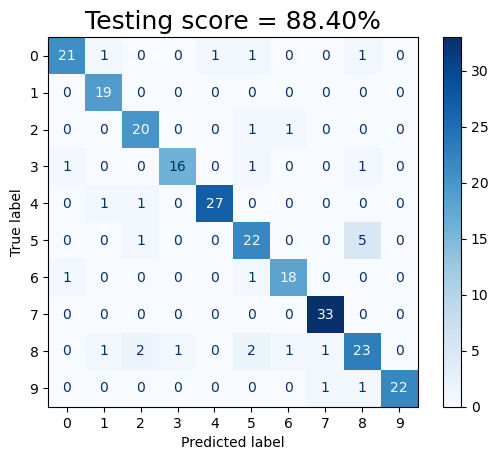

训练集样本数量： 750
测试集样本数量： 250


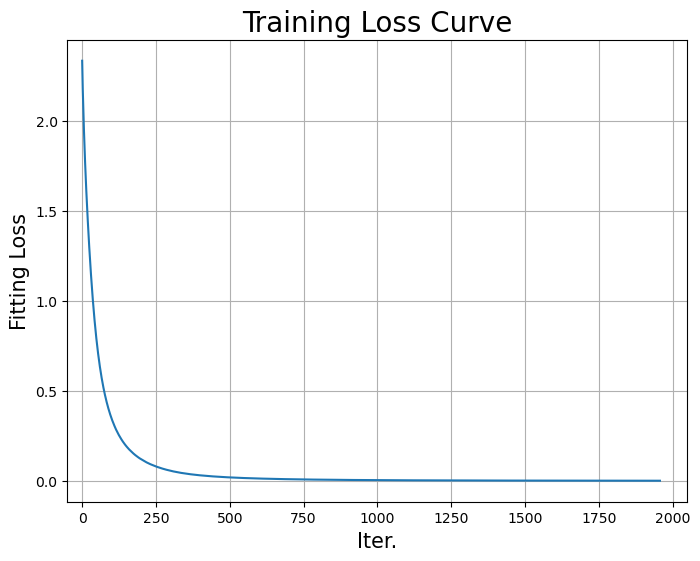

In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(30)
D = loadmat('C:/Users/ChienYu/Downloads/digits_train/Digits_train.mat')
# 因為手寫數字檔以Matlab的檔案格式儲存，因採用scipy.ip的loadmat()函數讀取
# D.keys()
X = D['X'] # images
y = D['y'] # labels: single output in 0~9


from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
        
# prepare data
X_train, X_test, y_train, y_test = train_test_split(X/255, y.ravel(), test_size = 0.25)

# ------setup and run ANN------
hidden_layers = (30,) # one hidden layer

# solver = ’sgd’ # not efficient, need more tuning
# solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
ANN = MLPClassifier(max_iter = 10000,
                    solver = solver,
                    hidden_layer_sizes = hidden_layers,
                    verbose = True,
                    activation = 'logistic', # default activation = ’relu’
                    tol = 1e-6,
                    random_state = 0
                    )
ANN.fit(X_train, y_train)
# ------setup and run ANN------

y_train_hat = ANN.predict(X_train)
y_test_hat = ANN.predict(X_test)
print('accuracy for training data: {:.2f}%'.format(100*np.mean(y_train_hat == y_train)))
print('accuracy for testing data: {:.2f}%'.format(100*np.mean(y_test_hat == y_test)))
score = ANN.score(X_test, y_test)
print('score = {:.2f}%'.format(100*score)) # 計算準確率

# Confusion matrix
fig = plt.figure(figsize = (8, 8))  
title = 'Testing score = {:.2f}%'.format(100*ANN.score(X_test, y_test))
# 進行混淆矩陣的計算
disp = ConfusionMatrixDisplay.from_estimator(
    ANN, # 分類器
    X_test, # 測試資料
    y_test, # 測試資料的標籤
    cmap=plt.cm.Blues, # 顏色
    # normalize='true', # 正規化
) # disp 為 ConfusionMatrixDisplay 物件
disp.ax_.set_title(title, fontsize = 18) # 設定圖表標題
plt.savefig('plot_40.png', dpi=300, bbox_inches='tight')
plt.show() # 顯示圖表

# plot the loss curve
fig = plt.figure(figsize = (8, 6))  
plt.plot(ANN.loss_curve_) # 繪製損失函數隨迭代次數的變化，x軸為迭代次數，y軸為損失函數
plt.xlabel('Iter.', fontsize = 15)
plt.ylabel('Fitting Loss', fontsize = 15)
plt.xlim(-50, 2050)
# plt.ylim(-0.1, 2.1)
plt.yticks(np.arange(0, 2.1, 0.5))
plt.title('Training Loss Curve', fontsize = 20)
plt.grid()
#plt.savefig('plot_41.png', dpi=300, bbox_inches='tight')

num_train_samples = X_train.shape[0]
num_test_samples = X_test.shape[0]

print("训练集样本数量：", num_train_samples)
print("测试集样本数量：", num_test_samples)


plt.show()

Iteration 1, loss = 2.33383885
Iteration 2, loss = 2.24778021
Iteration 3, loss = 2.17717632
Iteration 4, loss = 2.11567761
Iteration 5, loss = 2.05763188
Iteration 6, loss = 2.00288299
Iteration 7, loss = 1.94948432
Iteration 8, loss = 1.89992217
Iteration 9, loss = 1.85316013
Iteration 10, loss = 1.80797556
Iteration 11, loss = 1.76597807
Iteration 12, loss = 1.72503085
Iteration 13, loss = 1.68621970
Iteration 14, loss = 1.64849950
Iteration 15, loss = 1.61208403
Iteration 16, loss = 1.57683267
Iteration 17, loss = 1.54257532
Iteration 18, loss = 1.50981766
Iteration 19, loss = 1.47737654
Iteration 20, loss = 1.44574922
Iteration 21, loss = 1.41460582
Iteration 22, loss = 1.38471846
Iteration 23, loss = 1.35523382
Iteration 24, loss = 1.32644036
Iteration 25, loss = 1.29845606
Iteration 26, loss = 1.27117794
Iteration 27, loss = 1.24415945
Iteration 28, loss = 1.21802253
Iteration 29, loss = 1.19244918
Iteration 30, loss = 1.16716197
Iteration 31, loss = 1.14304540
Iteration 32, los

<Figure size 800x800 with 0 Axes>

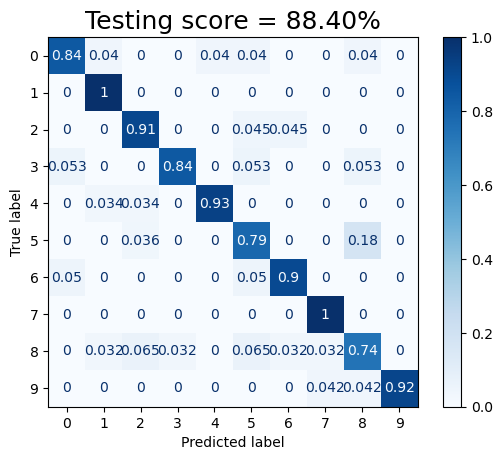

In [209]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(30)
D = loadmat('C:/Users/ChienYu/Downloads/digits_train/Digits_train.mat')
# 因為手寫數字檔以Matlab的檔案格式儲存，因採用scipy.ip的loadmat()函數讀取
# D.keys()
X = D['X'] # images
y = D['y'] # labels: single output in 0~9

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
        
# prepare data
X_train, X_test, y_train, y_test = train_test_split(X/255, y.ravel(), test_size = 0.25)


# ------setup and run ANN------
hidden_layers = (30,) # one hidden layer

# solver = ’sgd’ # not efficient, need more tuning
# solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
ANN = MLPClassifier(max_iter = 10000,
                    solver = solver,
                    hidden_layer_sizes = hidden_layers,
                    verbose = True,
                    activation = 'logistic', # default activation = ’relu’
                    tol = 1e-6,
                    random_state = 0
                    )
ANN.fit(X_train, y_train)
# ------setup and run ANN------

y_train_hat = ANN.predict(X_train)
y_test_hat = ANN.predict(X_test)
print('accuracy for training data: {:.2f}%'.format(100*np.mean(y_train_hat == y_train)))
print('accuracy for testing data: {:.2f}%'.format(100*np.mean(y_test_hat == y_test)))
score = ANN.score(X_test, y_test)
print('score = {:.2f}%'.format(100*score)) # 計算準確率

# Confusion matrix
fig = plt.figure(figsize = (8, 8))  
title = 'Testing score = {:.2f}%'.format(100*ANN.score(X_test, y_test))
# 進行混淆矩陣的計算
disp = ConfusionMatrixDisplay.from_estimator(
    ANN, # 分類器
    X_test, # 測試資料
    y_test, # 測試資料的標籤
    cmap=plt.cm.Blues, # 顏色
    normalize='true', # 正規化
) # disp 為 ConfusionMatrixDisplay 物件
disp.ax_.set_title(title, fontsize = 18) # 設定圖表標題
plt.savefig('plot_45.png', dpi=300, bbox_inches='tight')
plt.show() # 顯示圖表


Iteration 1, loss = 2.33885370
Iteration 2, loss = 2.19039691
Iteration 3, loss = 2.08427655
Iteration 4, loss = 1.99124025
Iteration 5, loss = 1.89768180
Iteration 6, loss = 1.80712201
Iteration 7, loss = 1.72298441
Iteration 8, loss = 1.64676100
Iteration 9, loss = 1.57278281
Iteration 10, loss = 1.50292961
Iteration 11, loss = 1.43672929
Iteration 12, loss = 1.37343913
Iteration 13, loss = 1.31292629
Iteration 14, loss = 1.25543252
Iteration 15, loss = 1.20060003
Iteration 16, loss = 1.14919849
Iteration 17, loss = 1.09975473
Iteration 18, loss = 1.05286148
Iteration 19, loss = 1.00864496
Iteration 20, loss = 0.96676907
Iteration 21, loss = 0.92687104
Iteration 22, loss = 0.88937246
Iteration 23, loss = 0.85338035
Iteration 24, loss = 0.81995865
Iteration 25, loss = 0.78808127
Iteration 26, loss = 0.75838061
Iteration 27, loss = 0.73017306
Iteration 28, loss = 0.70281670
Iteration 29, loss = 0.67731811
Iteration 30, loss = 0.65333121
Iteration 31, loss = 0.63086307
Iteration 32, los

<Figure size 800x800 with 0 Axes>

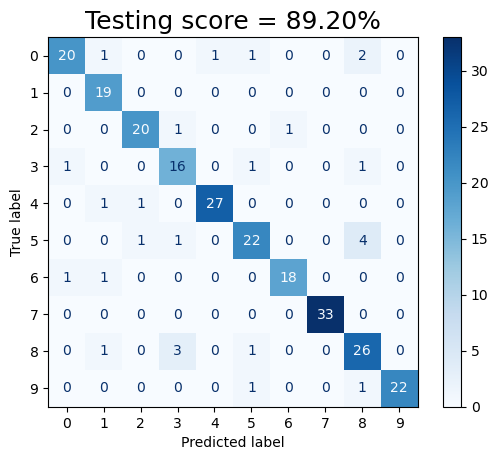

<Figure size 800x800 with 0 Axes>

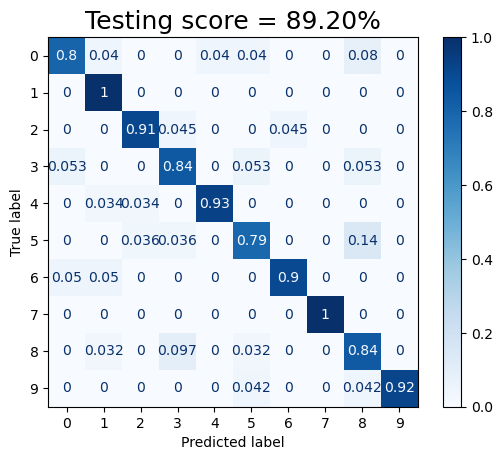

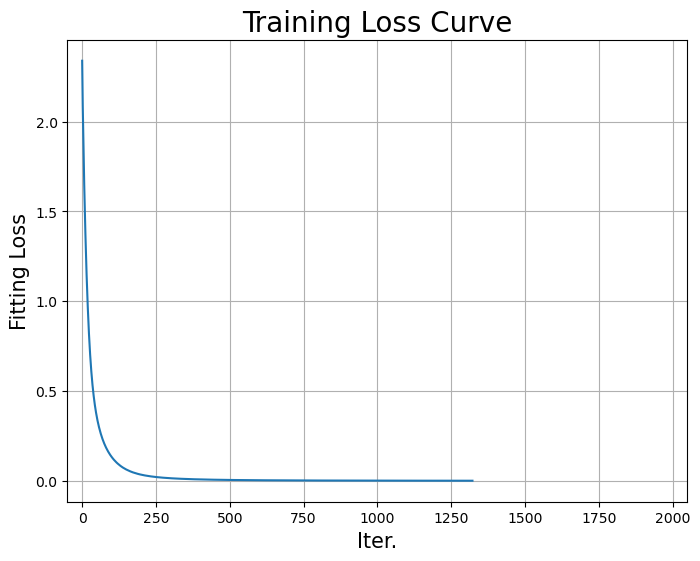

In [213]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(30)
D = loadmat('C:/Users/ChienYu/Downloads/digits_train/Digits_train.mat')
# 因為手寫數字檔以Matlab的檔案格式儲存，因採用scipy.ip的loadmat()函數讀取
# D.keys()
X = D['X'] # images
y = D['y'] # labels: single output in 0~9


from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
        
# prepare data
X_train, X_test, y_train, y_test = train_test_split(X/255, y.ravel(), test_size = 0.25)

# ------setup and run ANN------
hidden_layers = (80,) # one hidden layer

# solver = ’sgd’ # not efficient, need more tuning
# solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
ANN = MLPClassifier(max_iter = 10000,
                    solver = solver,
                    hidden_layer_sizes = hidden_layers,
                    verbose = True,
                    activation = 'logistic', # default activation = ’relu’
                    tol = 1e-6,
                    random_state = 0
                    )
ANN.fit(X_train, y_train)
# ------setup and run ANN------

y_train_hat = ANN.predict(X_train)
y_test_hat = ANN.predict(X_test)
print('accuracy for training data: {:.2f}%'.format(100*np.mean(y_train_hat == y_train)))
print('accuracy for testing data: {:.2f}%'.format(100*np.mean(y_test_hat == y_test)))
score = ANN.score(X_test, y_test)
print('score = {:.2f}%'.format(100*score)) # 計算準確率

# Confusion matrix
fig = plt.figure(figsize = (8, 8))  
title = 'Testing score = {:.2f}%'.format(100*ANN.score(X_test, y_test))
# 進行混淆矩陣的計算
disp = ConfusionMatrixDisplay.from_estimator(
    ANN, # 分類器
    X_test, # 測試資料
    y_test, # 測試資料的標籤
    cmap=plt.cm.Blues, # 顏色
    # normalize='true', # 正規化
) # disp 為 ConfusionMatrixDisplay 物件
disp.ax_.set_title(title, fontsize = 18) # 設定圖表標題
plt.savefig('plot_42.png', dpi=300, bbox_inches='tight')
plt.show() # 顯示圖表

# Confusion matrix
fig = plt.figure(figsize = (8, 8))  
title = 'Testing score = {:.2f}%'.format(100*ANN.score(X_test, y_test))
# 進行混淆矩陣的計算
disp = ConfusionMatrixDisplay.from_estimator(
    ANN, # 分類器
    X_test, # 測試資料
    y_test, # 測試資料的標籤
    cmap=plt.cm.Blues, # 顏色
    normalize='true', # 正規化
) # disp 為 ConfusionMatrixDisplay 物件
disp.ax_.set_title(title, fontsize = 18) # 設定圖表標題
plt.savefig('plot_46.png', dpi=300, bbox_inches='tight')
plt.show() # 顯示圖表

# plot the loss curve
fig = plt.figure(figsize = (8, 6))  
plt.plot(ANN.loss_curve_) # 繪製損失函數隨迭代次數的變化，x軸為迭代次數，y軸為損失函數
plt.xlabel('Iter.', fontsize = 15)
plt.ylabel('Fitting Loss', fontsize = 15)
plt.xlim(-50, 2050)
# plt.ylim(-0.1, 2.1)
plt.yticks(np.arange(0, 2.1, 0.5))
plt.title('Training Loss Curve', fontsize = 20)
plt.grid()
plt.savefig('plot_43.png', dpi=300, bbox_inches='tight')
plt.show()

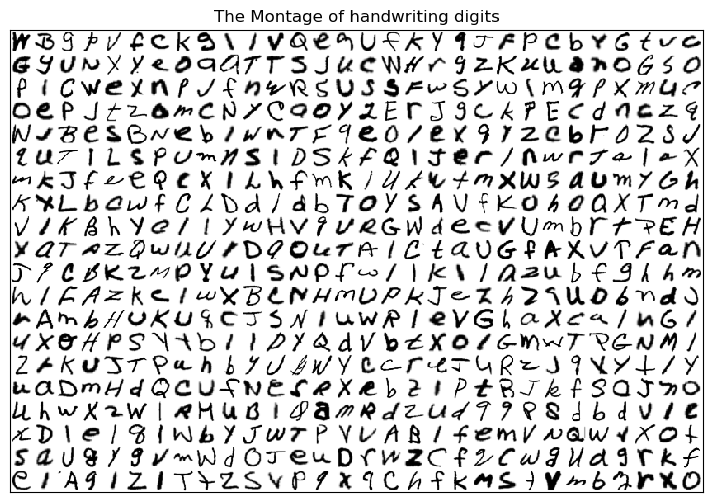

In [230]:
from scipy.io import loadmat
#data_dir = 'C:/Users/ChienYu/Downloads/'
D = loadmat('C:/Users/ChienYu/Downloads/letters_train (1)/Letters_train.mat')
# D.keys()
X = D['X'] # images
y = D['y'] # labels: single  output in 0-9

plt.figure(figsize = (9,6))
# prepare and diaplay a montage of digit images
n, m = 20, 30 # A n x m montage (total mn images)
sz = np.sqrt(X.shape[1]).astype('int') # image size sz x sz
M = np.zeros((m*sz, n*sz)) # montage image
A = X[:m*n,:] # show the first nm images
# Arrange images to form a montage
for i in range(m) :
    for j in range(n) :
        M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = A[i*n+j,:].reshape(sz, sz)
plt.imshow(M.T, cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.title('The Montage of handwriting digits')
plt.savefig('plot_49.png', dpi=300, bbox_inches='tight')
plt.show()


Iteration 1, loss = 3.17114669
Iteration 2, loss = 2.95441033
Iteration 3, loss = 2.76647129
Iteration 4, loss = 2.59212491
Iteration 5, loss = 2.43409151
Iteration 6, loss = 2.29250964
Iteration 7, loss = 2.16625664
Iteration 8, loss = 2.05513709
Iteration 9, loss = 1.95710389
Iteration 10, loss = 1.87032828
Iteration 11, loss = 1.79396698
Iteration 12, loss = 1.72574904
Iteration 13, loss = 1.66388254
Iteration 14, loss = 1.60824091
Iteration 15, loss = 1.55772319
Iteration 16, loss = 1.51248229
Iteration 17, loss = 1.47066484
Iteration 18, loss = 1.43292481
Iteration 19, loss = 1.39789994
Iteration 20, loss = 1.36586910
Iteration 21, loss = 1.33483889
Iteration 22, loss = 1.30666822
Iteration 23, loss = 1.28045950
Iteration 24, loss = 1.25617601
Iteration 25, loss = 1.23237648
Iteration 26, loss = 1.21134329
Iteration 27, loss = 1.19042280
Iteration 28, loss = 1.17057168
Iteration 29, loss = 1.15198021
Iteration 30, loss = 1.13518409
Iteration 31, loss = 1.11789197
Iteration 32, los

<Figure size 800x800 with 0 Axes>

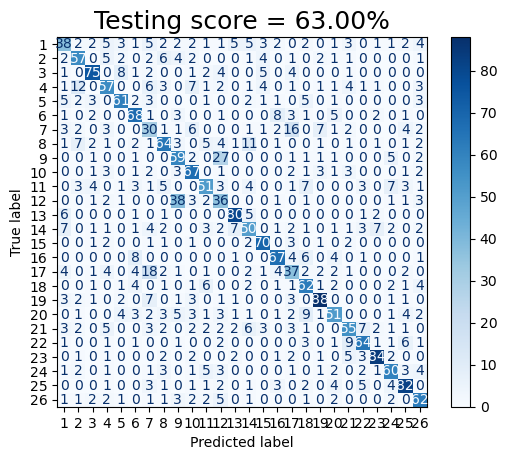

<Figure size 800x800 with 0 Axes>

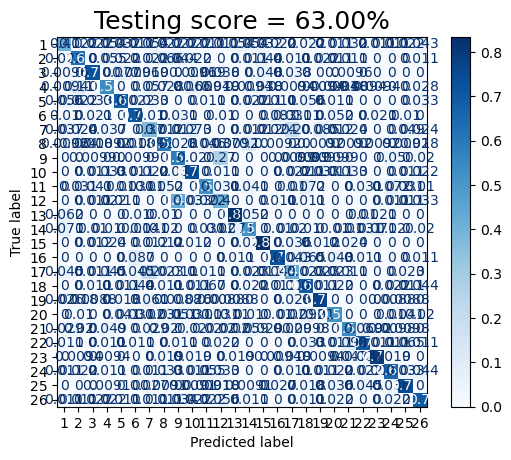

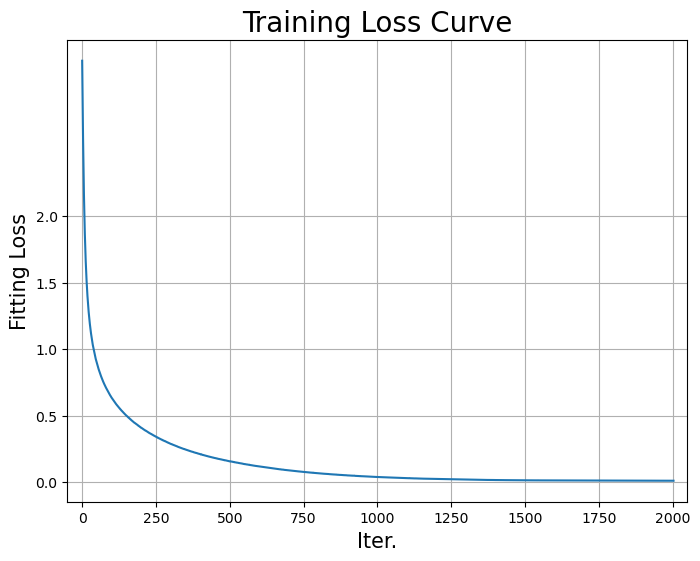

In [231]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(30)
D = loadmat('C:/Users/ChienYu/Downloads/letters_train (1)/Letters_train.mat')
# 因為手寫數字檔以Matlab的檔案格式儲存，因採用scipy.ip的loadmat()函數讀取
# D.keys()
X = D['X'] # images
y = D['y'] # labels: single output in 0~9


from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
        
# prepare data
X_train, X_test, y_train, y_test = train_test_split(X/255, y.ravel(), test_size = 0.25)

# ------setup and run ANN------
hidden_layers = (30,) # one hidden layer

# solver = ’sgd’ # not efficient, need more tuning
# solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
ANN = MLPClassifier(max_iter = 10000,
                    solver = solver,
                    hidden_layer_sizes = hidden_layers,
                    verbose = True,
                    activation = 'logistic', # default activation = ’relu’
                    tol = 1e-6,
                    random_state = 0
                    )
ANN.fit(X_train, y_train)
# ------setup and run ANN------

y_train_hat = ANN.predict(X_train)
y_test_hat = ANN.predict(X_test)
print('accuracy for training data: {:.2f}%'.format(100*np.mean(y_train_hat == y_train)))
print('accuracy for testing data: {:.2f}%'.format(100*np.mean(y_test_hat == y_test)))
score = ANN.score(X_test, y_test)
print('score = {:.2f}%'.format(100*score)) # 計算準確率

# Confusion matrix
fig = plt.figure(figsize = (8, 8))  
title = 'Testing score = {:.2f}%'.format(100*ANN.score(X_test, y_test))
# 進行混淆矩陣的計算
disp = ConfusionMatrixDisplay.from_estimator(
    ANN, # 分類器
    X_test, # 測試資料
    y_test, # 測試資料的標籤
    cmap=plt.cm.Blues, # 顏色
    # normalize='true', # 正規化
) # disp 為 ConfusionMatrixDisplay 物件
disp.ax_.set_title(title, fontsize = 18) # 設定圖表標題
plt.savefig('plot_50.png', dpi=300, bbox_inches='tight')
plt.show() # 顯示圖表

# Confusion matrix
fig = plt.figure(figsize = (8, 8))  
title = 'Testing score = {:.2f}%'.format(100*ANN.score(X_test, y_test))
# 進行混淆矩陣的計算
disp = ConfusionMatrixDisplay.from_estimator(
    ANN, # 分類器
    X_test, # 測試資料
    y_test, # 測試資料的標籤
    cmap=plt.cm.Blues, # 顏色
    normalize='true', # 正規化
) # disp 為 ConfusionMatrixDisplay 物件
disp.ax_.set_title(title, fontsize = 18) # 設定圖表標題
plt.savefig('plot_51.png', dpi=300, bbox_inches='tight')
plt.show() # 顯示圖表
# plot the loss curve
fig = plt.figure(figsize = (8, 6))  
plt.plot(ANN.loss_curve_) # 繪製損失函數隨迭代次數的變化，x軸為迭代次數，y軸為損失函數
plt.xlabel('Iter.', fontsize = 15)
plt.ylabel('Fitting Loss', fontsize = 15)
plt.xlim(-50, 2050)
# plt.ylim(-0.1, 2.1)
plt.yticks(np.arange(0, 2.1, 0.5))
plt.title('Training Loss Curve', fontsize = 20)
plt.grid()
plt.savefig('plot_52.png', dpi=300, bbox_inches='tight')
plt.show()

Iteration 1, loss = 3.07161286
Iteration 2, loss = 2.66451831
Iteration 3, loss = 2.32675291
Iteration 4, loss = 2.05831113
Iteration 5, loss = 1.85060606
Iteration 6, loss = 1.68962291
Iteration 7, loss = 1.56655057
Iteration 8, loss = 1.46905779
Iteration 9, loss = 1.38971801
Iteration 10, loss = 1.32424253
Iteration 11, loss = 1.26596007
Iteration 12, loss = 1.22039164
Iteration 13, loss = 1.17642611
Iteration 14, loss = 1.13983701
Iteration 15, loss = 1.10365184
Iteration 16, loss = 1.07246078
Iteration 17, loss = 1.04348009
Iteration 18, loss = 1.01633943
Iteration 19, loss = 0.99157465
Iteration 20, loss = 0.96822723
Iteration 21, loss = 0.94532724
Iteration 22, loss = 0.92542428
Iteration 23, loss = 0.90595997
Iteration 24, loss = 0.88766222
Iteration 25, loss = 0.87016822
Iteration 26, loss = 0.85189307
Iteration 27, loss = 0.83476302
Iteration 28, loss = 0.81957026
Iteration 29, loss = 0.80391878
Iteration 30, loss = 0.78978399
Iteration 31, loss = 0.77624305
Iteration 32, los

<Figure size 800x800 with 0 Axes>

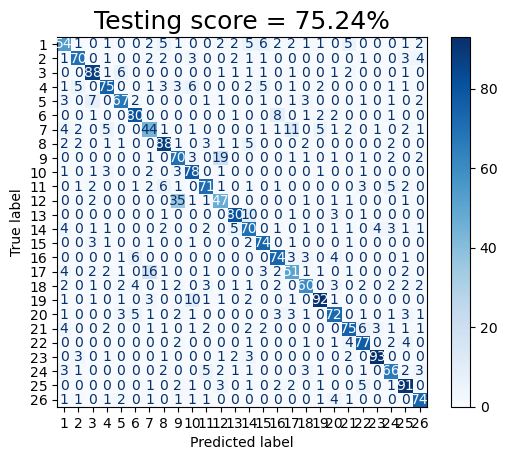

<Figure size 800x800 with 0 Axes>

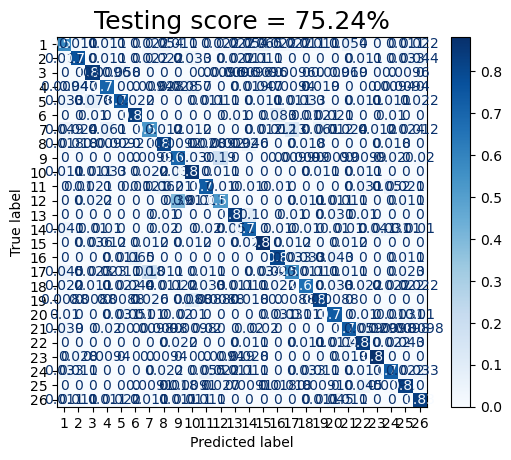

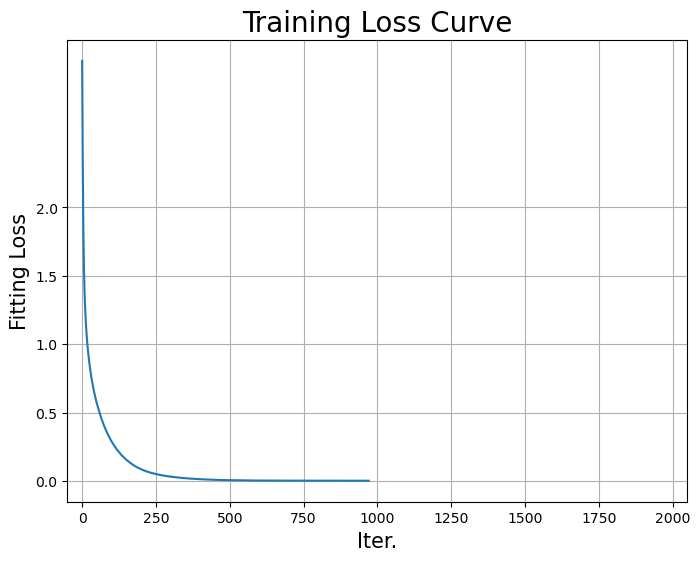

In [232]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(30)
D = loadmat('C:/Users/ChienYu/Downloads/letters_train (1)/Letters_train.mat')
# 因為手寫數字檔以Matlab的檔案格式儲存，因採用scipy.ip的loadmat()函數讀取
# D.keys()
X = D['X'] # images
y = D['y'] # labels: single output in 0~9


from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
        
# prepare data
X_train, X_test, y_train, y_test = train_test_split(X/255, y.ravel(), test_size = 0.25)

# ------setup and run ANN------
hidden_layers = (80,) # one hidden layer

# solver = ’sgd’ # not efficient, need more tuning
# solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
ANN = MLPClassifier(max_iter = 10000,
                    solver = solver,
                    hidden_layer_sizes = hidden_layers,
                    verbose = True,
                    activation = 'logistic', # default activation = ’relu’
                    tol = 1e-6,
                    random_state = 0
                    )
ANN.fit(X_train, y_train)
# ------setup and run ANN------

y_train_hat = ANN.predict(X_train)
y_test_hat = ANN.predict(X_test)
print('accuracy for training data: {:.2f}%'.format(100*np.mean(y_train_hat == y_train)))
print('accuracy for testing data: {:.2f}%'.format(100*np.mean(y_test_hat == y_test)))
score = ANN.score(X_test, y_test)
print('score = {:.2f}%'.format(100*score)) # 計算準確率

# Confusion matrix
fig = plt.figure(figsize = (8, 8))  
title = 'Testing score = {:.2f}%'.format(100*ANN.score(X_test, y_test))
# 進行混淆矩陣的計算
disp = ConfusionMatrixDisplay.from_estimator(
    ANN, # 分類器
    X_test, # 測試資料
    y_test, # 測試資料的標籤
    cmap=plt.cm.Blues, # 顏色
    # normalize='true', # 正規化
) # disp 為 ConfusionMatrixDisplay 物件
disp.ax_.set_title(title, fontsize = 18) # 設定圖表標題
plt.savefig('plot_53.png', dpi=300, bbox_inches='tight')
plt.show() # 顯示圖表

# Confusion matrix
fig = plt.figure(figsize = (8, 8))  
title = 'Testing score = {:.2f}%'.format(100*ANN.score(X_test, y_test))
# 進行混淆矩陣的計算
disp = ConfusionMatrixDisplay.from_estimator(
    ANN, # 分類器
    X_test, # 測試資料
    y_test, # 測試資料的標籤
    cmap=plt.cm.Blues, # 顏色
    normalize='true', # 正規化
) # disp 為 ConfusionMatrixDisplay 物件
disp.ax_.set_title(title, fontsize = 18) # 設定圖表標題
plt.savefig('plot_54.png', dpi=300, bbox_inches='tight')
plt.show() # 顯示圖表
# plot the loss curve
fig = plt.figure(figsize = (8, 6))  
plt.plot(ANN.loss_curve_) # 繪製損失函數隨迭代次數的變化，x軸為迭代次數，y軸為損失函數
plt.xlabel('Iter.', fontsize = 15)
plt.ylabel('Fitting Loss', fontsize = 15)
plt.xlim(-50, 2050)
# plt.ylim(-0.1, 2.1)
plt.yticks(np.arange(0, 2.1, 0.5))
plt.title('Training Loss Curve', fontsize = 20)
plt.grid()
plt.savefig('plot_55.png', dpi=300, bbox_inches='tight')
plt.show()